# Importing Libraries

In [ ]:
 pip install autocorrect

In [ ]:
import pandas as pd
# import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
from autocorrect import Speller
import string
%matplotlib inline
from matplotlib import rcParams
import nltk
nltk.download("punkt")
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import random

In [ ]:
!pip install pattern

In [4]:
import pattern
from gensim.utils import lemmatize
pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing SentiHood Train Dataset

In [ ]:
sentihood = pd.read_csv("/content/sample_data/sentihoodFull.csv")
sentihood.head()

,opinions/0/sentiment,opinions/0/aspect,opinions/0/target_entity,id,text,opinions/1/sentiment,opinions/1/aspect,opinions/1/target_entity,opinions/2/sentiment,opinions/2/aspect,opinions/2/target_entity,opinions/3/sentiment,opinions/3/aspect,opinions/3/target_entity,opinions/4/sentiment,opinions/4/aspect,opinions/4/target_entity,opinions/5/sentiment,opinions/5/aspect,opinions/5/target_entity,opinions/6/sentiment,opinions/6/aspect,opinions/6/target_entity,opinions/7/sentiment,opinions/7/aspect,opinions/7/target_entity,opinions/8/sentiment,opinions/8/aspect,opinions/8/target_entity,opinions/9/sentiment,opinions/9/aspect,opinions/9/target_entity
0,Negative,price,LOCATION1,1430,LOCATION1 is transforming and the prices w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Positive,shopping,LOCATION1,2013,Along LOCATION1 there are lots of Electronic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Positive,transit-location,LOCATION1,1244,And LOCATION1 is ten mins direct on the tube...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Positive,nightlife,LOCATION1,209,Another option is LOCATION1 which is very ce...,Positive,transit-location,LOCATION1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Positive,general,LOCATION1,2824,Best bet is around LOCATION2 and LOCATION1 a...,Positive,general,LOCATION2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


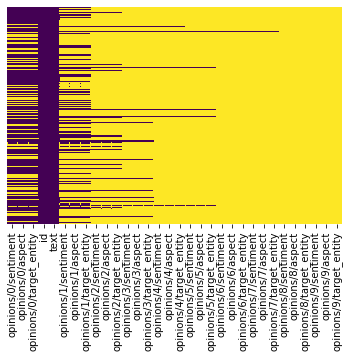

In [ ]:
sns.heatmap(sentihood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# renaming:
sentihood = sentihood.rename(columns={"opinions/0/sentiment":"sentiment1"})
sentihood = sentihood.rename(columns={"opinions/0/target_entity":"Location1"})
sentihood = sentihood.rename(columns={"opinions/0/aspect":"Aspect1"})

sentihood = sentihood.rename(columns={"opinions/1/sentiment":"sentiment2"})
sentihood = sentihood.rename(columns={"opinions/1/target_entity":"Location2"})
sentihood = sentihood.rename(columns={"opinions/1/aspect":"Aspect2"})

sentihood = sentihood.rename(columns={"opinions/2/sentiment":"sentiment3"})
sentihood = sentihood.rename(columns={"opinions/2/target_entity":"Location3"})
sentihood = sentihood.rename(columns={"opinions/2/aspect":"Aspect3"})

sentihood = sentihood.rename(columns={"opinions/3/sentiment":"sentiment4"})
sentihood = sentihood.rename(columns={"opinions/3/target_entity":"Location4"})
sentihood = sentihood.rename(columns={"opinions/3/aspect":"Aspect4"})

sentihood = sentihood.rename(columns={"opinions/4/sentiment":"sentiment5"})
sentihood = sentihood.rename(columns={"opinions/4/target_entity":"Location5"})
sentihood = sentihood.rename(columns={"opinions/4/aspect":"Aspect5"})

sentihood = sentihood.rename(columns={"opinions/5/sentiment":"sentiment6"})
sentihood = sentihood.rename(columns={"opinions/5/target_entity":"Location6"})
sentihood = sentihood.rename(columns={"opinions/5/aspect":"Aspect6"})

sentihood.drop('opinions/6/sentiment',axis=1,inplace=True)
sentihood.drop('opinions/6/target_entity',axis=1,inplace=True)
sentihood.drop('opinions/6/aspect',axis=1,inplace=True)

sentihood.drop('opinions/7/sentiment',axis=1,inplace=True)
sentihood.drop('opinions/7/target_entity',axis=1,inplace=True)
sentihood.drop('opinions/7/aspect',axis=1,inplace=True)

sentihood.drop('opinions/8/sentiment',axis=1,inplace=True)
sentihood.drop('opinions/8/target_entity',axis=1,inplace=True)
sentihood.drop('opinions/8/aspect',axis=1,inplace=True)

sentihood.drop('opinions/9/sentiment',axis=1,inplace=True)
sentihood.drop('opinions/9/target_entity',axis=1,inplace=True)
sentihood.drop('opinions/9/aspect',axis=1,inplace=True)
sentihood

,sentiment1,Aspect1,Location1,id,text,sentiment2,Aspect2,Location2,sentiment3,Aspect3,Location3,sentiment4,Aspect4,Location4,sentiment5,Aspect5,Location5,sentiment6,Aspect6,Location6
0,Negative,price,LOCATION1,1430,LOCATION1 is transforming and the prices w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Positive,shopping,LOCATION1,2013,Along LOCATION1 there are lots of Electronic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Positive,transit-location,LOCATION1,1244,And LOCATION1 is ten mins direct on the tube...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Positive,nightlife,LOCATION1,209,Another option is LOCATION1 which is very ce...,Positive,transit-location,LOCATION1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Positive,general,LOCATION1,2824,Best bet is around LOCATION2 and LOCATION1 a...,Positive,general,LOCATION2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,Positive,transit-location,LOCATION2,712,you can live out as far as LOCATION1/LOCATION2...,Positive,transit-location,LOCATION1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5211,NaN,NaN,NaN,68,you can probably get a room in LOCATION1 or LO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,NaN,NaN,NaN,442,you do realise that LOCATION1 and LOCATION2 ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,Positive,transit-location,LOCATION1,507,"you live around the LOCATION1 station, there's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


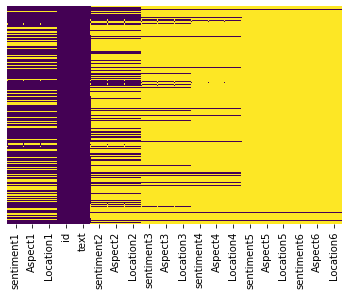

In [ ]:
sns.heatmap(sentihood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

***Add England Locations***

In [ ]:
Locations = pd.read_csv("/content/sample_data/uk-towns-sample.csv")
Locations.head()

,id,name,county,country,grid_reference,easting,northing,latitude,longitude,elevation,postcode_sector,local_government_area,nuts_region,type
0,1,Aaron's Hill,Surrey,England,SU957435,495783,143522,51.18291,-0.63098,78,GU7 2,Waverley District,South East,Suburban Area
1,2,Abbas Combe,Somerset,England,ST707226,370749,122688,51.00283,-2.41825,91,BA8 0,South Somerset District,South West,Village
2,3,Abberley,Worcestershire,England,SO744675,374477,267522,52.30522,-2.37574,152,WR6 6,Malvern Hills District,West Midlands,Village
3,4,Abberton,Essex,England,TM006190,600637,219093,51.83440,0.91066,44,CO5 7,Colchester District,Eastern,Village
4,5,Abberton,Worcestershire,England,SO995534,399538,253477,52.17955,-2.00817,68,WR10 2,Wychavon District,West Midlands,Hamlet


In [ ]:
locs = Locations[['county','country']].copy()
locs.value_counts()

In [ ]:
locs = pd.DataFrame(locs.loc[locs['country'] == 'England'])

In [ ]:
locs.count()

county     1201
country    1201
dtype: int64

In [ ]:
locs.head()

In [ ]:
locs = locs.drop_duplicates()

In [ ]:
# reset index
locs = locs.reset_index(drop=True)
locs

In [ ]:
england_cities_list = []
england_cities_list = locs['county'].tolist()
england_cities_list

In [ ]:
len(england_cities_list)

47

***change location1 and location2 to a random city in england***

In [ ]:
sentihoodWLoc = sentihood.copy()
sentihoodWLoc

,sentiment1,Aspect1,Location1,id,text,sentiment2,Aspect2,Location2,sentiment3,Aspect3,Location3,sentiment4,Aspect4,Location4,sentiment5,Aspect5,Location5,sentiment6,Aspect6,Location6
0,Negative,price,LOCATION1,1430,LOCATION1 is transforming and the prices w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Positive,shopping,LOCATION1,2013,Along LOCATION1 there are lots of Electronic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Positive,transit-location,LOCATION1,1244,And LOCATION1 is ten mins direct on the tube...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Positive,nightlife,LOCATION1,209,Another option is LOCATION1 which is very ce...,Positive,transit-location,LOCATION1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Positive,general,LOCATION1,2824,Best bet is around LOCATION2 and LOCATION1 a...,Positive,general,LOCATION2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,Positive,transit-location,LOCATION2,712,you can live out as far as LOCATION1/LOCATION2...,Positive,transit-location,LOCATION1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5211,NaN,NaN,NaN,68,you can probably get a room in LOCATION1 or LO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,NaN,NaN,NaN,442,you do realise that LOCATION1 and LOCATION2 ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,Positive,transit-location,LOCATION1,507,"you live around the LOCATION1 station, there's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def replace_loc1(tweet, location1 ,location2):
  if (pd.isnull(tweet)):
    return tweet
  tweet = tweet.replace("LOCATION1", location1)
  tweet = tweet.replace("LOCATION2", location2)
  return tweet

indexes = len(sentihoodWLoc.index)

for i in range(0,indexes):
  randomCity1 = random.choice(england_cities_list)
  randomCity2 = random.choice(england_cities_list)

  sentihoodWLoc.at[i, 'text'] = replace_loc1(sentihoodWLoc.text[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location1'] = replace_loc1(sentihoodWLoc.Location1[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location2'] = replace_loc1(sentihoodWLoc.Location2[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location3'] = replace_loc1(sentihoodWLoc.Location3[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location4'] = replace_loc1(sentihoodWLoc.Location4[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location5'] = replace_loc1(sentihoodWLoc.Location5[i] , randomCity1, randomCity2)
  sentihoodWLoc.at[i, 'Location6'] = replace_loc1(sentihoodWLoc.Location6[i] , randomCity1, randomCity2)

sentihoodWLoc

,sentiment1,Aspect1,Location1,id,text,sentiment2,Aspect2,Location2,sentiment3,Aspect3,Location3,sentiment4,Aspect4,Location4,sentiment5,Aspect5,Location5,sentiment6,Aspect6,Location6
0,Negative,price,Dorset,1430,Dorset is transforming and the prices will...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Positive,shopping,Surrey,2013,Along Surrey there are lots of Electronics s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Positive,transit-location,East Riding of Yorkshire,1244,And East Riding of Yorkshire is ten mins dir...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Positive,nightlife,Wiltshire,209,Another option is Wiltshire which is very ce...,Positive,transit-location,Wiltshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Positive,general,Leicestershire,2824,Best bet is around Greater London and Leices...,Positive,general,Greater London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,Positive,transit-location,East Riding of Yorkshire,712,you can live out as far as Cambridgeshire/East...,Positive,transit-location,Cambridgeshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5211,NaN,NaN,NaN,68,you can probably get a room in Gloucestershire...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,NaN,NaN,NaN,442,you do realise that Surrey and Gloucestershire...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,Positive,transit-location,Kent,507,"you live around the Kent station, there's a Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sentihood_opinion = sentihoodWLoc[['text', 'sentiment1', 'Location1', 'Aspect1', 'sentiment2', 'Location2', 'Aspect2']].copy()
sentihood_opinion

In [ ]:
sentihood_opinion = sentihood_opinion.rename(columns={"text":"OriginalText"})
sentihood_opinion

In [ ]:
sentihood_opinion = pd.concat([sentihood_opinion, sentihood['text']], axis=1)
sentihood_opinion

,OriginalText,sentiment1,Location1,Aspect1,sentiment2,Location2,Aspect2,text
0,Dorset is transforming and the prices will...,Negative,Dorset,price,NaN,NaN,NaN,LOCATION1 is transforming and the prices w...
1,Along Surrey there are lots of Electronics s...,Positive,Surrey,shopping,NaN,NaN,NaN,Along LOCATION1 there are lots of Electronic...
2,And East Riding of Yorkshire is ten mins dir...,Positive,East Riding of Yorkshire,transit-location,NaN,NaN,NaN,And LOCATION1 is ten mins direct on the tube...
3,Another option is Wiltshire which is very ce...,Positive,Wiltshire,nightlife,Positive,Wiltshire,transit-location,Another option is LOCATION1 which is very ce...
4,Best bet is around Greater London and Leices...,Positive,Leicestershire,general,Positive,Greater London,general,Best bet is around LOCATION2 and LOCATION1 a...
...,...,...,...,...,...,...,...,...
5210,you can live out as far as Cambridgeshire/East...,Positive,East Riding of Yorkshire,transit-location,Positive,Cambridgeshire,transit-location,you can live out as far as LOCATION1/LOCATION2...
5211,you can probably get a room in Gloucestershire...,NaN,NaN,NaN,NaN,NaN,NaN,you can probably get a room in LOCATION1 or LO...
5212,you do realise that Surrey and Gloucestershire...,NaN,NaN,NaN,NaN,NaN,NaN,you do realise that LOCATION1 and LOCATION2 ar...
5213,"you live around the Kent station, there's a Na...",Positive,Kent,transit-location,NaN,NaN,NaN,"you live around the LOCATION1 station, there's..."


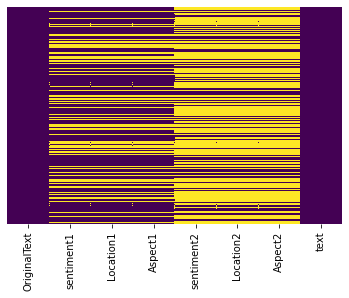

In [ ]:
sns.heatmap(sentihood_opinion.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sentihood_opinion.to_csv('sentihoodWLocs.csv', index=False)

***Handling Null Values***

In [ ]:
sentOpinion = pd.DataFrame(sentihood_opinion)
sentOpinion

In [ ]:
sentOpinion.isnull().sum()

In [ ]:
sentOpinion = sentOpinion[sentOpinion['sentiment1'].notna()]
sentOpinion

In [ ]:
sentOpinion.isnull().sum()

In [ ]:
# reset index
sentOpinion = sentOpinion.reset_index(drop=True)
sentOpinion

***sentiment text to int***


In [ ]:
sentiment = pd.get_dummies(sentOpinion['sentiment1'],drop_first=True)
sentiment2 = pd.get_dummies(sentOpinion['sentiment2'],drop_first=True)
# text = sentOpinion['text']
sentihoodOpinion = sentOpinion
sentihoodOpinion = pd.concat([sentOpinion.OriginalText, sentOpinion.Location1, sentOpinion.Aspect1, sentiment, sentOpinion.Location2, sentOpinion.Aspect2],axis=1)
sentihoodOpinion.head()

,OriginalText,Location1,Aspect1,Positive,Location2,Aspect2
0,Dorset is transforming and the prices will...,Dorset,price,0,NaN,NaN
1,Along Surrey there are lots of Electronics s...,Surrey,shopping,1,NaN,NaN
2,And East Riding of Yorkshire is ten mins dir...,East Riding of Yorkshire,transit-location,1,NaN,NaN
3,Another option is Wiltshire which is very ce...,Wiltshire,nightlife,1,Wiltshire,transit-location
4,Best bet is around Greater London and Leices...,Leicestershire,general,1,Greater London,general


In [ ]:
sentihoodOpinion = sentihoodOpinion.rename(columns={"Positive":"Sentiment1"})
sentihoodOpinion.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2
0,Dorset is transforming and the prices will...,Dorset,price,0,NaN,NaN
1,Along Surrey there are lots of Electronics s...,Surrey,shopping,1,NaN,NaN
2,And East Riding of Yorkshire is ten mins dir...,East Riding of Yorkshire,transit-location,1,NaN,NaN
3,Another option is Wiltshire which is very ce...,Wiltshire,nightlife,1,Wiltshire,transit-location
4,Best bet is around Greater London and Leices...,Leicestershire,general,1,Greater London,general


In [ ]:
sentihoodOpinion = pd.concat([sentihoodOpinion, sentiment2, sentOpinion.text],axis=1)
sentihoodOpinion = sentihoodOpinion.rename(columns={"Positive":"Sentiment2"})
sentihoodOpinion = sentihoodOpinion.rename(columns={"text":"Text"})
sentihoodOpinion.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Text
0,Dorset is transforming and the prices will...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...
1,Along Surrey there are lots of Electronics s...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...
2,And East Riding of Yorkshire is ten mins dir...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...
3,Another option is Wiltshire which is very ce...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...
4,Best bet is around Greater London and Leices...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...


In [ ]:
# Prepare data for NER

# list of abbreviated negations
appos =  { "'d": "would", "'ve": "have", "n't":"not", "'re": "are", "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
 
# function:
def handle_neg(sentence):
  words = sentence.split()
  reformed = [appos[word] if word in appos else word for word in words]
  reformed = " ".join(reformed)
  return reformed

# Applying the function:
sentihoodOpinion['OriginalText'] = sentihoodOpinion['OriginalText'].apply(handle_neg)

# Punctuations Fn:
def remove_Punct(tweet):
  clean_tweet=[]
  for word in tweet:
      if word not in string.punctuation:
          clean_tweet.append(word)
          reformed = "".join(clean_tweet)
  return reformed

# Applying Fn:
sentihoodOpinion['OriginalText'] = sentihoodOpinion['OriginalText'].apply(remove_Punct)


# Target Entity Recognition using NER

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
# nlp.pipe_names
import json

In [ ]:
#  loading pre-existing spacy model
nlp = en_core_web_sm.load()

In [ ]:
# Getting the pipeline component
ner=nlp.get_pipe("ner")

In [ ]:
  # ignore - no longer needed
# initializing string
test_str = "London is so diverse there are no racist areas  I live in Cumbria and have never had any problems"
# regex to get words, loop to get each start and end index
res = [(ele.start(), ele.end()) for ele in re.finditer(r'\S+', test_str)]
  
# printing result
print("Word Ranges are : " + str(res))

Word Ranges are : [(0, 6), (7, 9), (10, 12), (13, 20), (21, 26), (27, 30), (31, 33), (34, 40), (41, 46), (48, 49), (50, 54), (55, 57), (58, 65), (66, 69), (70, 74), (75, 80), (81, 84), (85, 88), (89, 97)]


***Train the NER model to recognize my data:***

In [ ]:
#  Formatting training data:
TRAIN_DATA = [ 
 ["Surrey is a good place to live with a major rail station", {"entities": [[0, 6, "GPE"]]}] ,
 ["Try searching in  Gloucestershire or Somerset", {"entities" : [ [37, 45,"GPE"], [18, 33,"GPE"] ] } ],
 ["I think the farthest out in essex to be close to London would be Worcestershire", {"entities" : [ [65, 79, "GPE"] ] } ], 
 ["I would stay away from Essex and Buckinghamshire area's as many parts are very run down and deprived", {"entities" : [ [23, 28, "GPE"] ] } ], 
 ["Northumberland is predominantly safe", {"entities" : [ [0, 14, "GPE"] ] } ], 
 ["Devon over the last 10 years now has some restaurants/pubs/bars to rival Devon , people who can afford them would not go into areas they felt unsafe or indeed live there", {"entities" : [ [0, 5, "GPE"] ] } ], 
 ["- The high street gets very busy at the weekend and in the summer because Gloucestershire is listed in all the tourist guides as a 'must see' alternative place in London", {"entities" : [ [66, 73, "GPE"] ] } ], 
 ["And of course South Yorkshire rd doesn't count", {"entities" : [ [14,29, "GPE"] ] } ], 
 ["Any of my old buddies live up towards Herefordshire, -would be nice to see them,too", {"entities" : [ [38, 52, "GPE"] ] } ], 
 ["Avoid Warwickshire , near West Yorkshire is very nice to live ,", {"entities" : [ [6, 18, "GPE"] ] } ], 
 ["Catherine Wheel Road, Shropshire", {"entities" : [ [22, 32, "GPE"] ] } ], 
 ["Famous Buildings and Monuments etc - The Houses of Parliament and Big Ben, Staffordshire and Downing Street", {"entities" : [ [75, 88, "GPE"] ] } ], 
 ["For Fish and Chips, in Greater Manchester go to the Rock and Sole Plaice in Endell Street", {"entities" : [ [23, 41, "GPE"] ] } ], 
 ["From Shropshire and Wiltshire, the Central Line will whisk you straight to Chancery Lane in around 30-40 minutes", {"entities" : [ [20, 30, "GPE"] ] } ], 
 [" I am looking around West Yorkshire, Lancashire, and Swiss Village", {"entities" : [ [37, 48, "GPE"] ] } ], 
 ["I am sure you will enjoy living in Cumbria, I have lived here most of my adult life and think it's a great place  The borough of Cumbria is  overall a nice, friendly area", {"entities" : [ [130, 137, "GPE"] ] } ], 
 [" I have had a look on internet and it seems there are areas very unsafe there like Greater London", {"entities" : [ [83, 97, "GPE"] ] } ], 
 ["I now live in Dorset with a lovely set of neighbours from all sorts of ethnic backgrounds", {"entities" : [ [14, 20,"GPE"] ] } ], 
 ["I was born in Worcestershire, West Sussex", {"entities" : [ [30, 41, "GPE"] ] } ], 
 [" I would feel less safe walking around Hertfordshire at night than I do elsewhere in LB of West Midlands, relatively-speaking", {"entities" : [ [39, 52,"GPE"], [91,105,"GPE"]  ] } ], 
 ["I would n't want to live in either , but Cambridgeshire has some nice houses being build along the canal and the Olympics will force the council to improve matters further", {"entities" : [ [41, 55, "GPE"] ] } ], 
 [" I would recommend either Cornwall or Cheshire as an alternative", {"entities" : [ [38, 46,"GPE"], [26, 34,"GPE"] ] } ], 
 ["I've lived here for over 20 yrs and before that in Hampshire for  ah but that would be telling", {"entities" : [ [51, 60,"GPE"] ] } ], 
 ["In living and working in the West Yorkshire I can say im pretty happy with where i live, however i do live right on the river", {"entities" : [ [29,43,"GPE"] ] } ], 
 ["It 's true there are more ` upmarket ' areas of London , but for me the Oxfordshire has the right mix of the rough and the smooth", {"entities" : [ [72, 83,"GPE"] ] } ], 
 [" It depends what you mean by bad , even Northamptonshire and Isle of Wight have areas I am wary of at night for safety reasons", {"entities" : [ [40, 56,"GPE"] ] } ], 
 ["It's the train stop before Leicestershire which is where all the London Boys alight to work in the financial district", {"entities" : [ [27, 41,"GPE"] ] } ], 
 ["Derbyshire - A very notorious area", {"entities" : [ [0, 10,"GPE"] ] } ], 
 ["Lincolnshire and Rutland are quiet", {"entities" : [ [0, 12,"GPE"] ] } ], 
 ["Durham and North Yorkshire are probably your best bet ", {"entities" : [ [11,26,"GPE"], [0,6,"GPE"] ] } ], 
 ["Norfolk and East Riding of Yorkshire, feels unsafe and people look a bit scary and dodgy", {"entities" : [ [0,7,"GPE"] ] } ], 
 ["West Midlands area will offer you some idea of prices", {"entities" : [ [0,13,"GPE"] ] } ], 
 ["Kent has a sprawling village atmosphere actually and contains some vast communal open land and wooded areas ", {"entities" : [ [0,4,"GPE"] ] } ], 
 ["Nottinghamshire is about as cosmopolitan as it gets", {"entities" : [ [0, 15,"GPE"] ] } ], 
 ["Buckinghamshire is great", {"entities" : [ [0,15,"GPE"] ] } ], 
 ["Cornwall is in Kent and not London", {"entities" : [ [0,8,"GPE"] ] } ], 
 ["Isle of Wight is probably slightly cheaper ", {"entities" : [ [0,13,"GPE"] ] } ], 
 ["South Yorkshire - An average area but has the very dodgy St Raphaels Estate East Riding of Yorkshire - A diverse area", {"entities" : [ [76,100,"GPE"] ] } ], 
 ["Merseyside / Cornwall is the traditional going out area", {"entities" : [ [0,10,"GPE"], [13,21,"GPE"] ] } ], 
 ["Durham and West Yorkshire Sunday Markets are great", {"entities" : [ [0,6,"GPE"] ] } ], 
 ["Tyne and Wear and the West Midlands has gone the same", {"entities" : [ [0,13,"GPE"], [22, 35,"GPE"] ] } ], 
 ["Nice areas to live are places like East Sussex or West Yorkshire is nice north of the river", {"entities" : [ [35,46,"GPE"] ] } ], 
 ["North of the river Thames from the river Lea in the east to the river Colne in the west was the county of Berkshire ", {"entities" : [ [106,115,"GPE"] ] } ], 
 ["On balance - Rutland for daytime stuff, Devon for evening", {"entities" : [ [13, 20,"GPE"] ] } ], 
 ["People always think Bedfordshire is bad ", {"entities" : [ [20, 32,"GPE"] ] } ],
 ["you do realise that Gloucestershire and Devon are IN Greater London", {"entities" : [ [20, 35,"GPE"], [40, 45,"GPE"], [53, 67,"GPE"] ] } ],
 ["  just go to Norfolk and you'll be in the centre of London", {"entities" : [ [52, 58,"GPE"] ] } ],
 ["Crossrail mainline link between Rutland, central London and north Kent", {"entities" : [ [66, 70,"GPE"], [49, 55,"GPE"], [32, 39,"GPE"], [0, 9,"GPE"] ] } ],
 ["Central London based taxis mostly refuse fares to suburban areas like Leicestershire" ,{"entities" : [ [ 0 ,14 ,"GPE"], [ 70, 84 ,"GPE"]] }] , 
 ["Personally, I preferred Bristol",{"entities" : [ [ 24, 31,"GPE"]] }],
 ["Rutland aint too bad" ,{"entities" : [ [ 0,7 ,"GPE"]] } ],
 ["London is so diverse there are no racist areas  I live in Cumbria and have never had any problems", {"entities" : [ [ 0,6 ,"GPE"], [ 58, 65 ,"GPE"]] }]
]

In [ ]:
# Adding labels to the `ner`

for _, annotations in TRAIN_DATA:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [ ]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [ ]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path

# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 30 iterations
  for iteration in range(70):

    # shuufling examples  before every iteration
    random.shuffle(TRAIN_DATA)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
        print("Losses", losses)

***Testing Trained Data***

In [ ]:
# Testing the model
doc = nlp("  Down here in South London the accent [local] in Hampshire tends to be a bit more Essex and Hertfordshire")
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities [('South London', 'GPE'), ('Hampshire', 'GPE'), ('Essex', 'GPE'), ('Hertfordshire', 'GPE')]


In [ ]:
# Text with nlp

# doc = nlp("European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices")
doc = nlp("London is so diverse there are no racist areas  I live in Cumbria and have never had any problems")
print( [ (X.text, X.label_) for X in doc.ents] )

[('London', 'GPE'), ('Cumbria', 'GPE')]


***Extracting Locations:***

In [ ]:
def extract_locs(tweet):
  doc = nlp(tweet)
  return ( [ (X.text, X.label_) for X in doc.ents] )

extracted_Locations = sentihoodOpinion['OriginalText'].apply(extract_locs)

count = 0
textToTrain = []

for index in range(0, len(extracted_Locations)):
  if(extracted_Locations.iloc[index] == []):
    count +=1
    textToTrain += [sentihoodOpinion.OriginalText[index]]

print(textToTrain)
print(count)
extracted_Locations

In [ ]:
# concat cleaned text with original
sentihoodOpinion = sentihoodOpinion.rename(columns={"OriginalText":"LocText"})
sentihoodOpinion = sentihoodOpinion.rename(columns={"Text":"MaskedText"})
sentihood7elwa = pd.concat([sentihoodOpinion, extracted_Locations], axis=1)
sentihood7elwa

,LocText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,OriginalText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]"
1,Along Surrey there are lots of Electronics sho...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...,"[(Surrey, GPE)]"
2,And East Riding of Yorkshire is ten mins direc...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...,"[(East Riding of Yorkshire, GPE), (West Midlan..."
3,Another option is Wiltshire which is very cent...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...,"[(Wiltshire, GPE)]"
4,Best bet is around Greater London and Leiceste...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...,"[(Greater London, GPE), (Leicestershire, GPE)]"
...,...,...,...,...,...,...,...,...,...
3524,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[(Nottinghamshire, GPE)]"
3525,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[(Hampshire, GPE)]"
3526,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[(Greater London, GPE), (Central London, GPE)]"
3527,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[(Kent, GPE), (National Railway, GPE)]"


In [ ]:
sentihood7elwa = sentihood7elwa.rename(columns={"OriginalText":"LocationsInText"})
sentihood7elwa = sentihood7elwa.rename(columns={"LocText":"OriginalText"})
sentihood7elwa.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]"
1,Along Surrey there are lots of Electronics sho...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...,"[(Surrey, GPE)]"
2,And East Riding of Yorkshire is ten mins direc...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...,"[(East Riding of Yorkshire, GPE), (West Midlan..."
3,Another option is Wiltshire which is very cent...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...,"[(Wiltshire, GPE)]"
4,Best bet is around Greater London and Leiceste...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...,"[(Greater London, GPE), (Leicestershire, GPE)]"


In [ ]:
sentihood7elwa.to_csv('sentihood7elwa.csv', index=False)

***Data that still needed further processing and cleaning etc etc***

In [ ]:
count2 = 0
moreThan2 = []
indexesList = []

for index in range(0, len(extracted_Locations)):
  if(len(extracted_Locations.iloc[index]) >2):
    count2 +=1
    moreThan2 += [sentihood7elwa.OriginalText[index]]
    indexesList += [index]

print(moreThan2)
print(indexesList)
print(count2)
# extracted_Locations

['Everyone in Kent is now black or Bangladeshi', 'Tyne and Wear and Merseyside are the better area of West and Southwest London', 'Crossrail mainline link between Cambridgeshire central London and north Kent', 'I live in Hampshire and I love it Oxfordshire just stay away from Oxfordshire lol', 'I would suggest SE London somewhere like Essex or Devon but its been years Ive lived in London', 'Surrey has connections to Gatwick and Luton Airports and lots of cool places that you might want to visit like Brighton', 'Herefordshire in Kent is a lovely ancient market town with a good fast rail service to West Midlands', 'West Midlands in Kent or Durham in Kent might be worth a look', 'Hertfordshire in Northern London is nice and Tyne and Wear is nice in the South', 'West Yorkshire is central London so extremely expensive Derbyshire is often considered the coolest area of London', 'Cornwall is fine  not much happens there  Surrey is SW London is better in every conceivable way', 'My hometown is

In [ ]:
print(extracted_Locations.iloc[39])
sentihoodOpinion.Text[39]

[('Cambridgeshire', 'GPE'), ('Cambridgeshire', 'GPE'), ('Central London', 'GPE')]


'Cambridgeshire in Cambridgeshire might be suitable but its more than 30 minutes to Central London'

Now that i have the locations in a list:

# Organizing and Validation:

extract from lists -> put in seperate columns -> compare to existing columns and validate


In [ ]:
#  model accuracy = 92.5%

In [5]:
# loading the downloaded senti7elwa badal ma n-run mn el awel -> for consistent data
sentihood7elwa = pd.read_csv("/content/sample_data/sentihood7elwa.csv")
sentihood7elwa.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[('Dorset', 'GPE')]"
1,Along Surrey there are lots of Electronics sho...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...,"[('Surrey', 'GPE')]"
2,And East Riding of Yorkshire is ten mins direc...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...,"[('East Riding of Yorkshire', 'GPE'), ('West M..."
3,Another option is Wiltshire which is very cent...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...,"[('Wiltshire', 'GPE')]"
4,Best bet is around Greater London and Leiceste...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...,"[('Greater London', 'GPE'), ('Leicestershire',..."


Duplicating Negatives:

In [7]:
sentihood7elwa.Sentiment1.value_counts()

1    2598
0     931
Name: Sentiment1, dtype: int64

In [8]:
#  reserved the same just in case something went wrong
sentihoodReserve = pd.DataFrame(sentihood7elwa)
sentihoodReserve

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[('Dorset', 'GPE')]"
1,Along Surrey there are lots of Electronics sho...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...,"[('Surrey', 'GPE')]"
2,And East Riding of Yorkshire is ten mins direc...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...,"[('East Riding of Yorkshire', 'GPE'), ('West M..."
3,Another option is Wiltshire which is very cent...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...,"[('Wiltshire', 'GPE')]"
4,Best bet is around Greater London and Leiceste...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...,"[('Greater London', 'GPE'), ('Leicestershire',..."
...,...,...,...,...,...,...,...,...,...
3524,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[('Nottinghamshire', 'GPE')]"
3525,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[('Hampshire', 'GPE')]"
3526,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[('Greater London', 'GPE'), ('Central London',..."
3527,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[('Kent', 'GPE'), ('National Railway', 'GPE')]"


In [ ]:
negatives = pd.DataFrame(sentihood7elwa.loc[sentihood7elwa['Sentiment1'] == 0])
negatives

In [ ]:
SentihoodLarge = negatives.append(sentihood7elwa, ignore_index = True)
print(SentihoodLarge.Sentiment1.value_counts())
SentihoodLarge

1    2598
0    1862
Name: Sentiment1, dtype: int64


,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,Central London based taxis mostly refuse far...,"[(Central London, GPE), (Rutland, GPE)]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,Don't go looking at places like LOCATION1 n...,"[(East Riding of Yorkshire, GPE)]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,For gods sake don't move to LOCATION1 its ho...,"[(Isle of Wight, GPE)]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,I dont like LOCATION1 at all,"[(Oxfordshire, GPE)]"
...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[(Nottinghamshire, GPE)]"
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[(Hampshire, GPE)]"
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[(Greater London, GPE), (Central London, GPE)]"
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[(Kent, GPE), (National Railway, GPE)]"


# Time Analysis

generate a new column of made up / simulated dates

In [ ]:
SentihoodLarge.Location1.value_counts()

In [ ]:
import datetime

In [ ]:
def generate_date(tweet):
  month = random.randint(1, 12)
  day = random.randint(1, 28)
  tweetAt = datetime.datetime(2020, month, day)
  return tweetAt

TweetAt = SentihoodLarge['OriginalText'].apply(generate_date)
TweetAt

In [ ]:
SentihoodLarge = SentihoodLarge.rename(columns={"OriginalText":"Text"})
SentihoodLarge = pd.concat([SentihoodLarge, TweetAt], axis=1)
SentihoodLarge

,Text,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,OriginalText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]",2020-02-09
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,Central London based taxis mostly refuse far...,"[(Central London, GPE), (Rutland, GPE)]",2020-07-15
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,Don't go looking at places like LOCATION1 n...,"[(East Riding of Yorkshire, GPE)]",2020-06-15
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,For gods sake don't move to LOCATION1 its ho...,"[(Isle of Wight, GPE)]",2020-10-05
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,I dont like LOCATION1 at all,"[(Oxfordshire, GPE)]",2020-05-25
...,...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[(Nottinghamshire, GPE)]",2020-03-18
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[(Hampshire, GPE)]",2020-10-01
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[(Greater London, GPE), (Central London, GPE)]",2020-02-08
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[(Kent, GPE), (National Railway, GPE)]",2020-02-12


In [ ]:
SentihoodLarge = SentihoodLarge.rename(columns={"OriginalText":"Date"})
SentihoodLarge = SentihoodLarge.rename(columns={"Text":"OriginalText"})
SentihoodLarge

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,Date
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]",2020-02-09
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,Central London based taxis mostly refuse far...,"[(Central London, GPE), (Rutland, GPE)]",2020-07-15
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,Don't go looking at places like LOCATION1 n...,"[(East Riding of Yorkshire, GPE)]",2020-06-15
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,For gods sake don't move to LOCATION1 its ho...,"[(Isle of Wight, GPE)]",2020-10-05
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,I dont like LOCATION1 at all,"[(Oxfordshire, GPE)]",2020-05-25
...,...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[(Nottinghamshire, GPE)]",2020-03-18
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[(Hampshire, GPE)]",2020-10-01
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[(Greater London, GPE), (Central London, GPE)]",2020-02-08
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[(Kent, GPE), (National Railway, GPE)]",2020-02-12


# Data Visualization

Now that i (Technically) have the: 1) Location, 2) Aspect, 3) Time:
Generate the results: the graphs

In [ ]:
# Sentiment Counts (Positive and Negative) for each county in England
# Number of tweets per day for the most positive and most negative Locations
# Aspects correlated with positive sentiment and negative sentiments
# Sentiment Counts for aspects
# Most common words mentioned

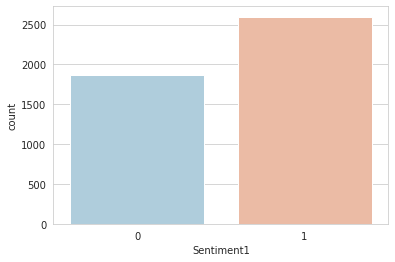

In [ ]:
# sentiment: positive vs negative
sns.set_style('whitegrid')
sns.countplot(x='Sentiment1',data=SentihoodLarge,palette='RdBu_r')

In [ ]:
dataViz = SentihoodLarge.groupby(['Date'], as_index=False)['OriginalText'].count()
dataViz

,Date,OriginalText
0,2020-01-01,14
1,2020-01-02,15
2,2020-01-03,19
3,2020-01-04,9
4,2020-01-05,12
...,...,...
331,2020-12-24,16
332,2020-12-25,15
333,2020-12-26,13
334,2020-12-27,19


In [ ]:
from matplotlib import rcParams

Text(0, 0.5, 'Tweets count')

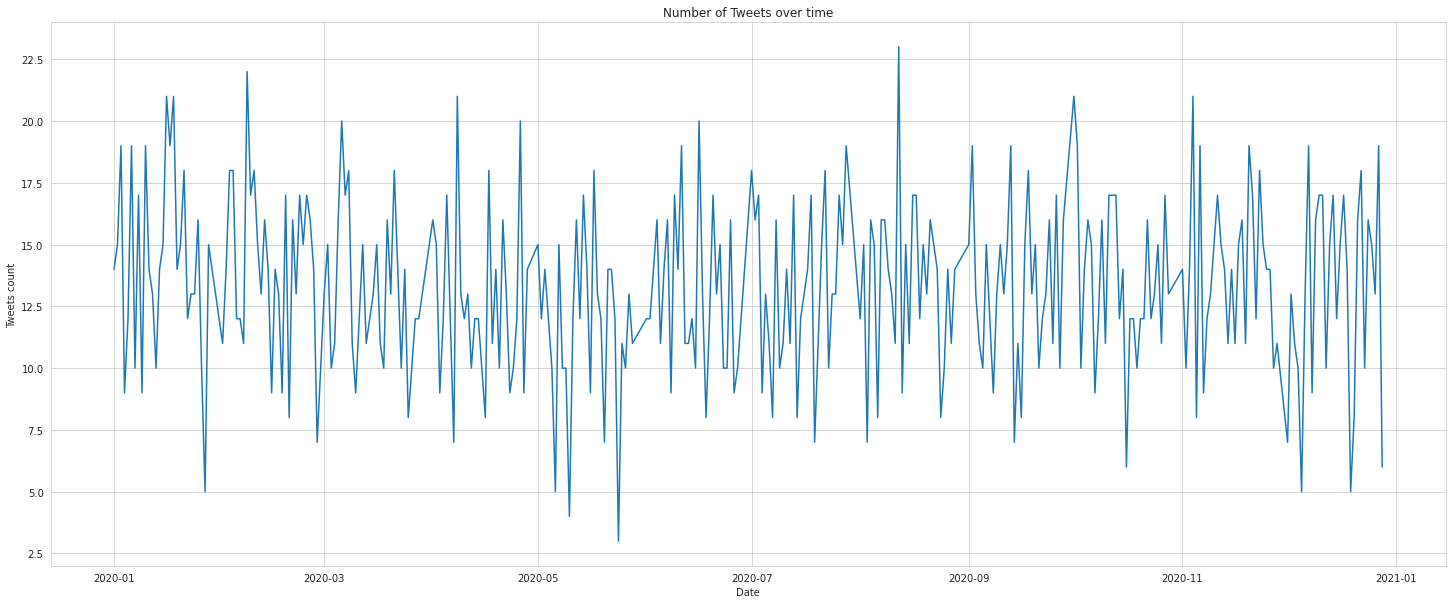

In [ ]:
#  Number of tweets over time
rcParams['figure.figsize'] = 25, 10
plt.plot(dataViz.Date,dataViz.OriginalText)
plt.title("Number of Tweets over time")
plt.xlabel("Date")
plt.ylabel("Tweets count")

In [ ]:
highPosLocs = pd.DataFrame(SentihoodLarge.loc[SentihoodLarge['Sentiment1'] == 1])
# print(highPosLocs.Date.value_counts())
# Buckinghamshire             67
# Derbyshire                  66
# Cheshire                    66
highPosLocs

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,Date
932,Along Surrey there are lots of Electronics sho...,Surrey,shopping,1,NaN,NaN,0,Along LOCATION1 there are lots of Electronic...,"[(Surrey, GPE)]",2020-03-27
933,And East Riding of Yorkshire is ten mins direc...,East Riding of Yorkshire,transit-location,1,NaN,NaN,0,And LOCATION1 is ten mins direct on the tube...,"[(East Riding of Yorkshire, GPE), (West Midlan...",2020-04-08
934,Another option is Wiltshire which is very cent...,Wiltshire,nightlife,1,Wiltshire,transit-location,1,Another option is LOCATION1 which is very ce...,"[(Wiltshire, GPE)]",2020-01-23
935,Best bet is around Greater London and Leiceste...,Leicestershire,general,1,Greater London,general,1,Best bet is around LOCATION2 and LOCATION1 a...,"[(Greater London, GPE), (Leicestershire, GPE)]",2020-05-06
938,Everyone in Kent is now black or Bangladeshi,Kent,multicultural,1,NaN,NaN,0,Everyone in LOCATION1 is now black or Bangla...,"[(Everyone, GPE), (Kent, GPE), (Bangladeshi, G...",2020-06-10
...,...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in LOCATION1 and liked how close it w...,"[(Nottinghamshire, GPE)]",2020-03-18
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in LOCATION1 is non-violent a...,"[(Hampshire, GPE)]",2020-10-01
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as LOCATION1/LOCATION2...,"[(Greater London, GPE), (Central London, GPE)]",2020-02-08
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"you live around the LOCATION1 station, there's...","[(Kent, GPE), (National Railway, GPE)]",2020-02-12


In [ ]:
highPosLocs.Date.value_counts()

In [ ]:
data_viz = highPosLocs.groupby(['Date'], as_index=False)['Sentiment1'].count()
data_viz

In [ ]:
highNegLocs = pd.DataFrame(SentihoodLarge.loc[SentihoodLarge['Sentiment1'] == 0])
# print(highNegLocs.Date.value_counts())
# Lancashire                  31
# Somerset                    30
# Cambridgeshire              28
highNegLocs


,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,Date
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,LOCATION1 is transforming and the prices w...,"[(Dorset, GPE)]",2020-02-09
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,Central London based taxis mostly refuse far...,"[(Central London, GPE), (Rutland, GPE)]",2020-07-15
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,Don't go looking at places like LOCATION1 n...,"[(East Riding of Yorkshire, GPE)]",2020-06-15
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,For gods sake don't move to LOCATION1 its ho...,"[(Isle of Wight, GPE)]",2020-10-05
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,I dont like LOCATION1 at all,"[(Oxfordshire, GPE)]",2020-05-25
...,...,...,...,...,...,...,...,...,...,...
4440,most places in Cheshire is messed up,Cheshire,general,0,NaN,NaN,0,most places in LOCATION1 is messed up,"[(Cheshire, GPE)]",2020-03-14
4442,no need to live in Gloucestershire which is ge...,Gloucestershire,live,0,Gloucestershire,transit-location,0,no need to live in LOCATION1 which is generall...,"[(Gloucestershire, GPE)]",2020-07-08
4443,opinion Wiltshire is a hole to live in,Wiltshire,live,0,NaN,NaN,0,opinion - LOCATION1 is a hole to live in,"[(Wiltshire, GPE)]",2020-06-22
4448,the borough of Devon is quite quiet and boring,Devon,general,0,Devon,quiet,1,the borough of LOCATION1 is quite quiet and b...,"[(Devon, GPE)]",2020-09-25


In [ ]:
highNegLocs.Date.value_counts()

2020-11-11    12
2020-12-22    11
2020-10-11    11
2020-06-16    11
2020-08-07    10
              ..
2020-05-24     1
2020-05-20     1
2020-02-06     1
2020-09-01     1
2020-12-19     1
Name: Date, Length: 336, dtype: int64

In [ ]:
data_viz2 = highNegLocs.groupby(['Date'], as_index=False)['Sentiment1'].count()
data_viz2

,Date,Sentiment1
0,2020-01-01,9
1,2020-01-02,7
2,2020-01-03,10
3,2020-01-04,4
4,2020-01-05,5
...,...,...
331,2020-12-24,5
332,2020-12-25,5
333,2020-12-26,5
334,2020-12-27,7


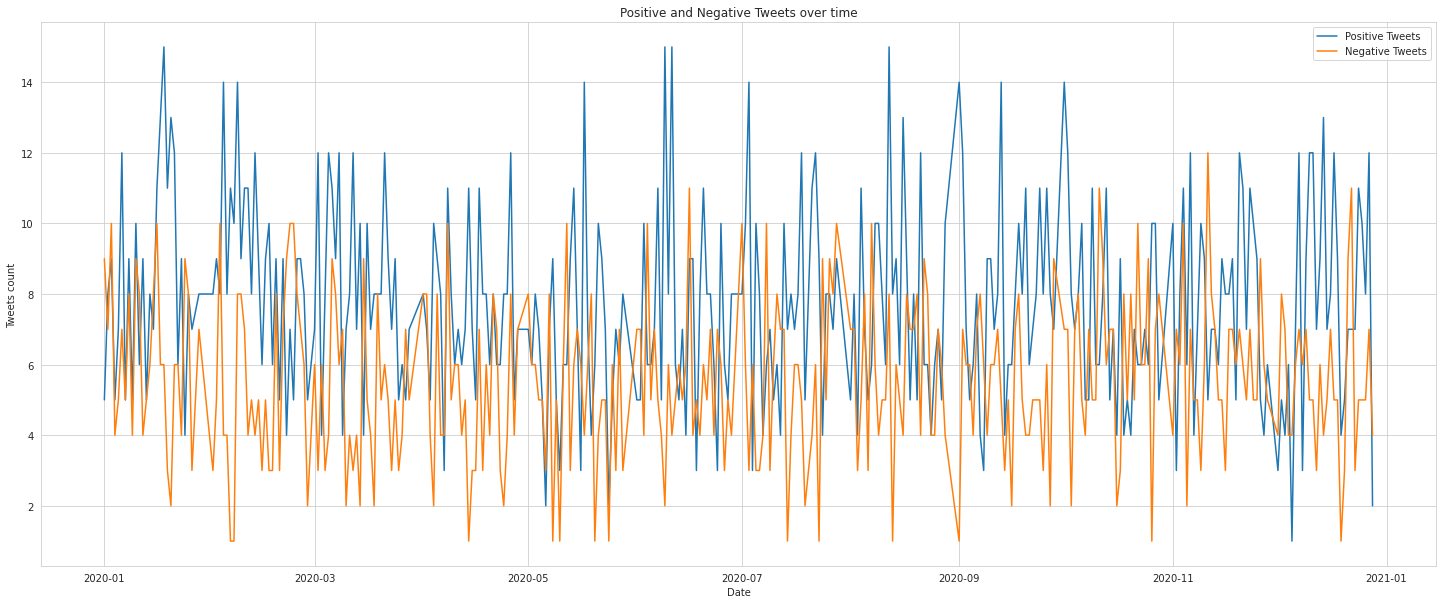

In [ ]:
rcParams['figure.figsize'] = 25, 10
# Positive sentiment over time
# highPosLocs
plt.plot(data_viz.Date,data_viz.Sentiment1)
# Negative sentiment over time
# highNegLocs
plt.plot(data_viz2.Date,data_viz2.Sentiment1)
plt.title("Positive and Negative Tweets over time")
plt.xlabel("Date")
plt.ylabel("Tweets count")
plt.legend(['Positive Tweets', 'Negative Tweets']);

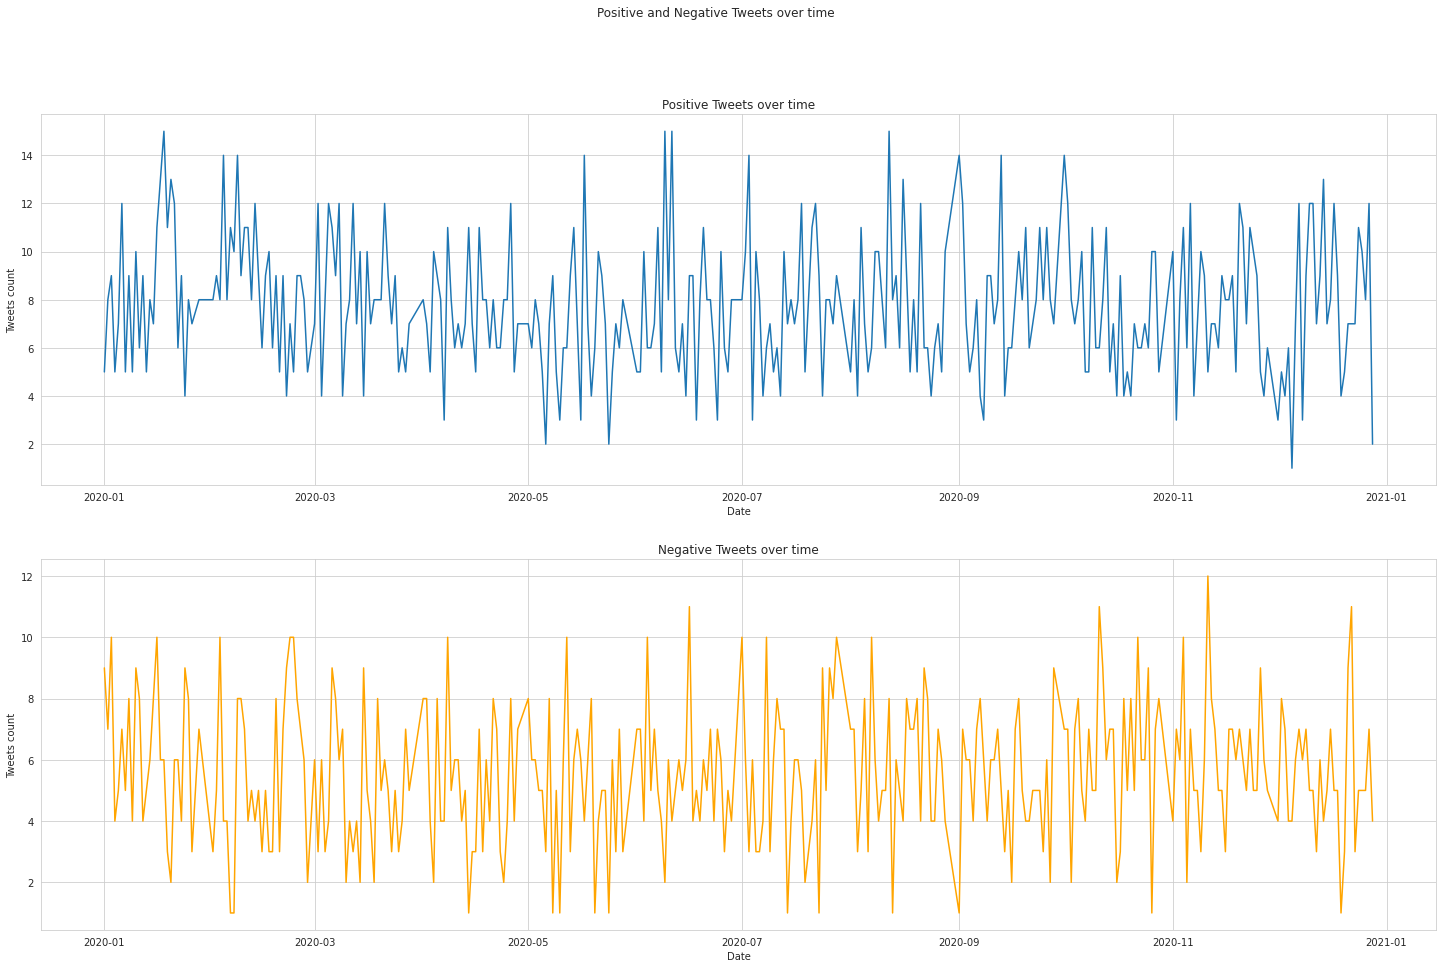

In [ ]:
rcParams['figure.figsize'] = 25, 15
# Positive sentiment over time
# highPosLocs
plt.subplot(2, 1, 1)
plt.plot(data_viz.Date,data_viz.Sentiment1)
plt.title("Positive Tweets over time")
plt.xlabel("Date")
plt.ylabel("Tweets count")

# Negative sentiment over time
# highNegLocs
plt.subplot(2, 1, 2)
plt.plot(data_viz2.Date,data_viz2.Sentiment1, color = "orange")
plt.title("Negative Tweets over time")
plt.xlabel("Date")
plt.ylabel("Tweets count")

plt.suptitle("Positive and Negative Tweets over time");


Text(0.5, 0, 'Positive sentiment')

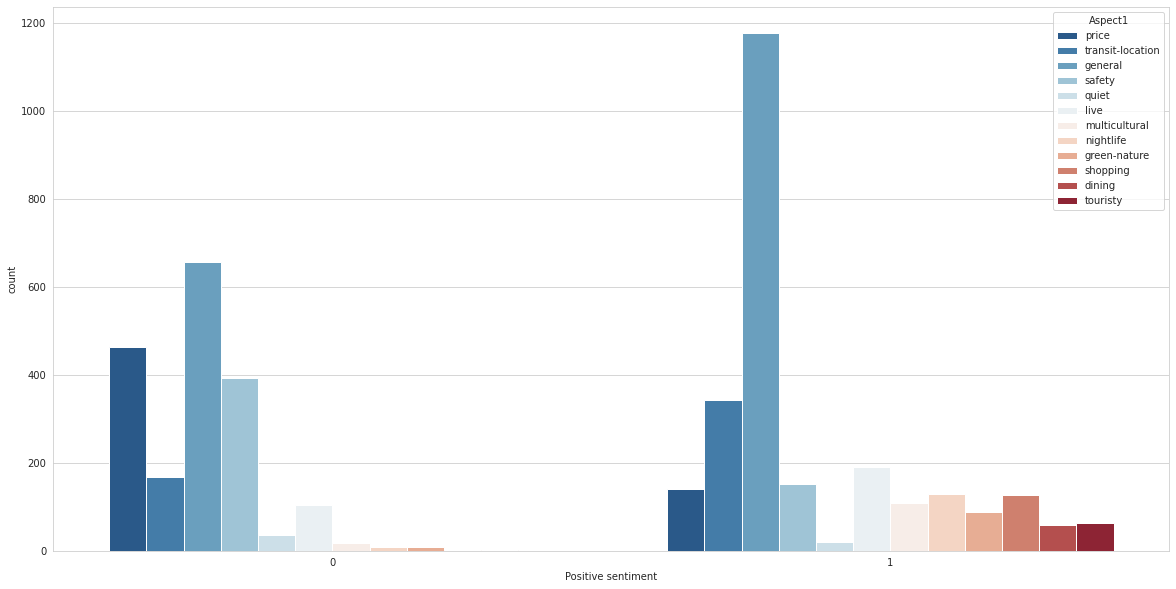

In [ ]:
# sentiment per aspects
rcParams['figure.figsize'] = 20, 10
sns.set_style('whitegrid')
sns.countplot(x='Sentiment1',hue='Aspect1',data=SentihoodLarge,palette='RdBu_r')
plt.xlabel("Positive sentiment")
# general has the highest number in both positive and negative then:
# price is the highest aspect associated with negative sentiment where, transit-location is the highest aspect associated with the positive sentiment

Text(0.5, 0, 'Aspect')

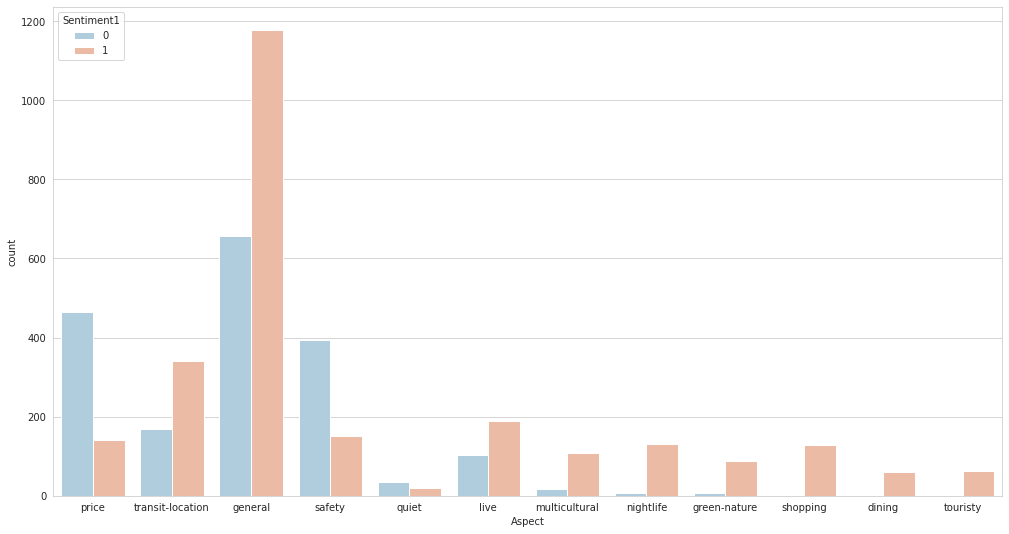

In [ ]:
# general has the highest number in both positive and negative then:
# price is the highest aspect associated with negative sentiment followed by the safety
# where, transit-location is the highest aspect associated with the positive sentiment followed by live which stands for livability
sns.set_style('whitegrid')
plt.figure(figsize=(17,9))
sns.countplot(x='Aspect1',hue='Sentiment1',data=SentihoodLarge,palette='RdBu_r')
plt.xlabel("Aspect")

Text(0.5, 0, 'Sentiment')

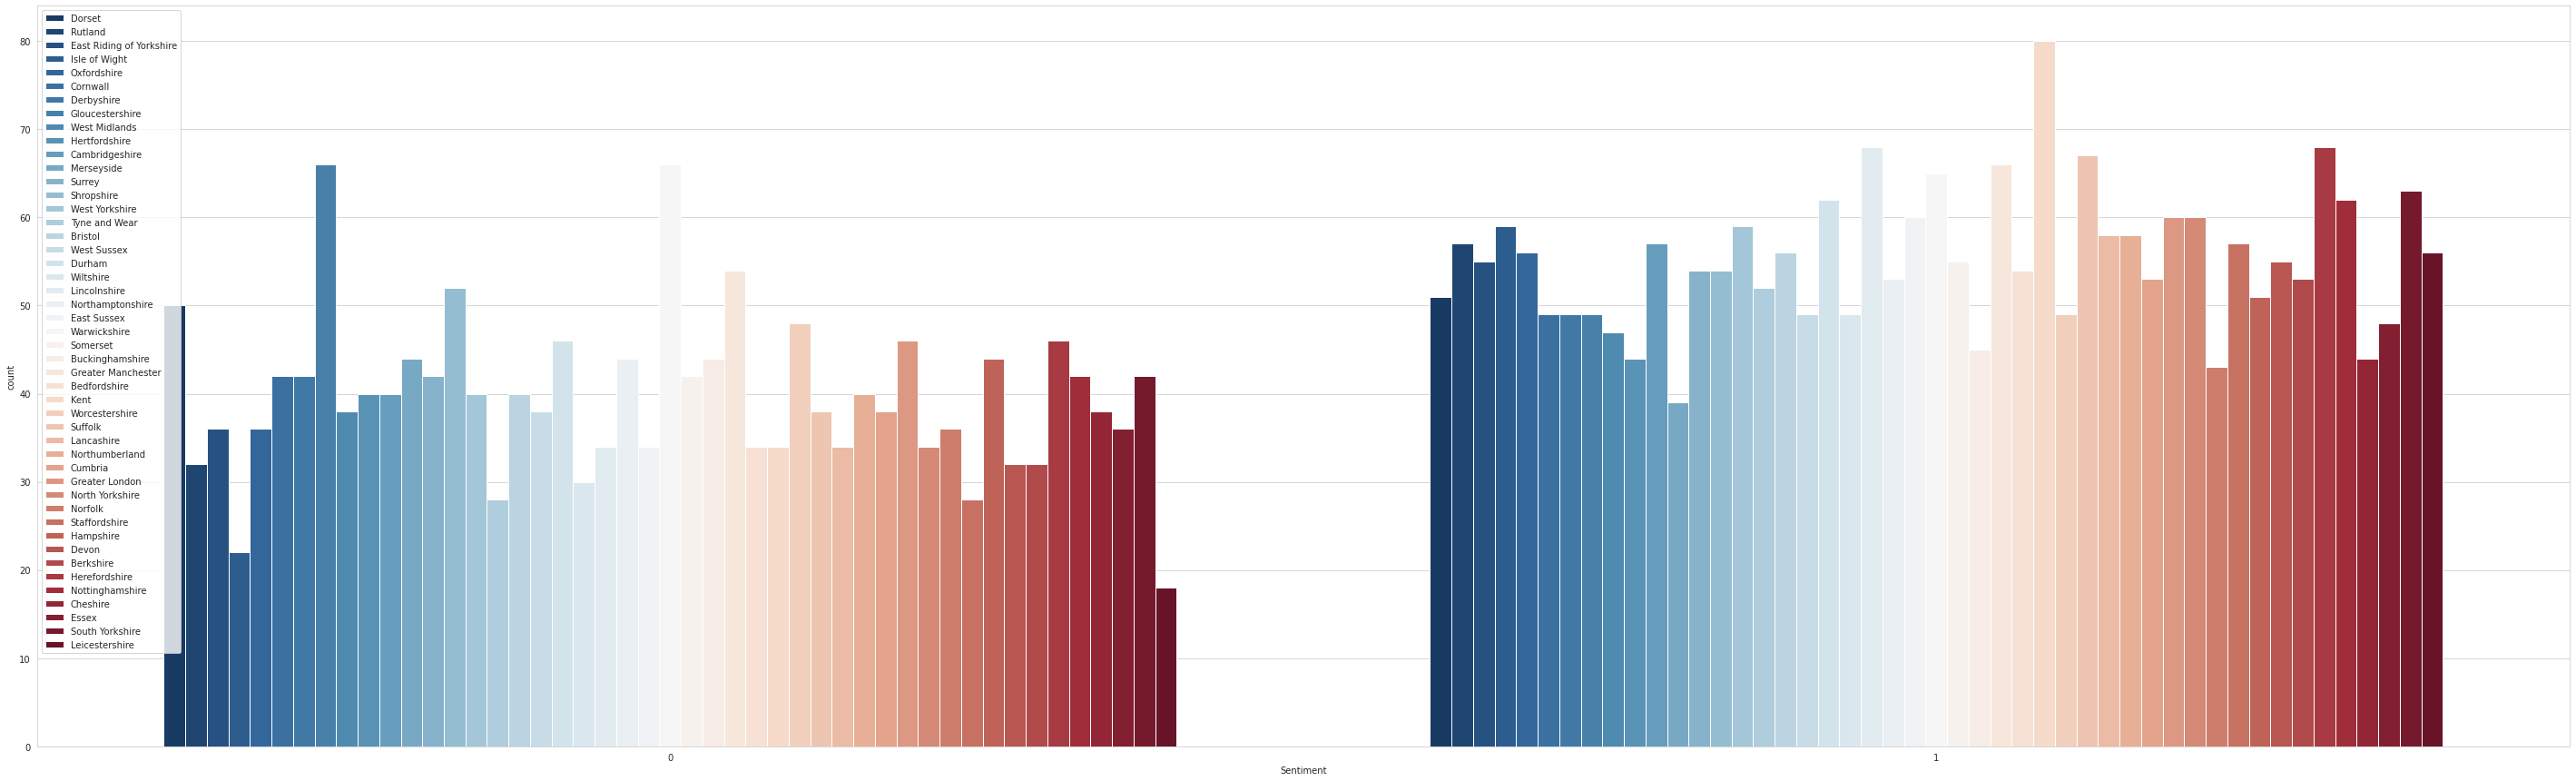

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(50,15))
sns.countplot(x='Sentiment1',hue='Location1',data=SentihoodLarge,palette='RdBu_r')
plt.legend(loc=2)
plt.xlabel("Sentiment")

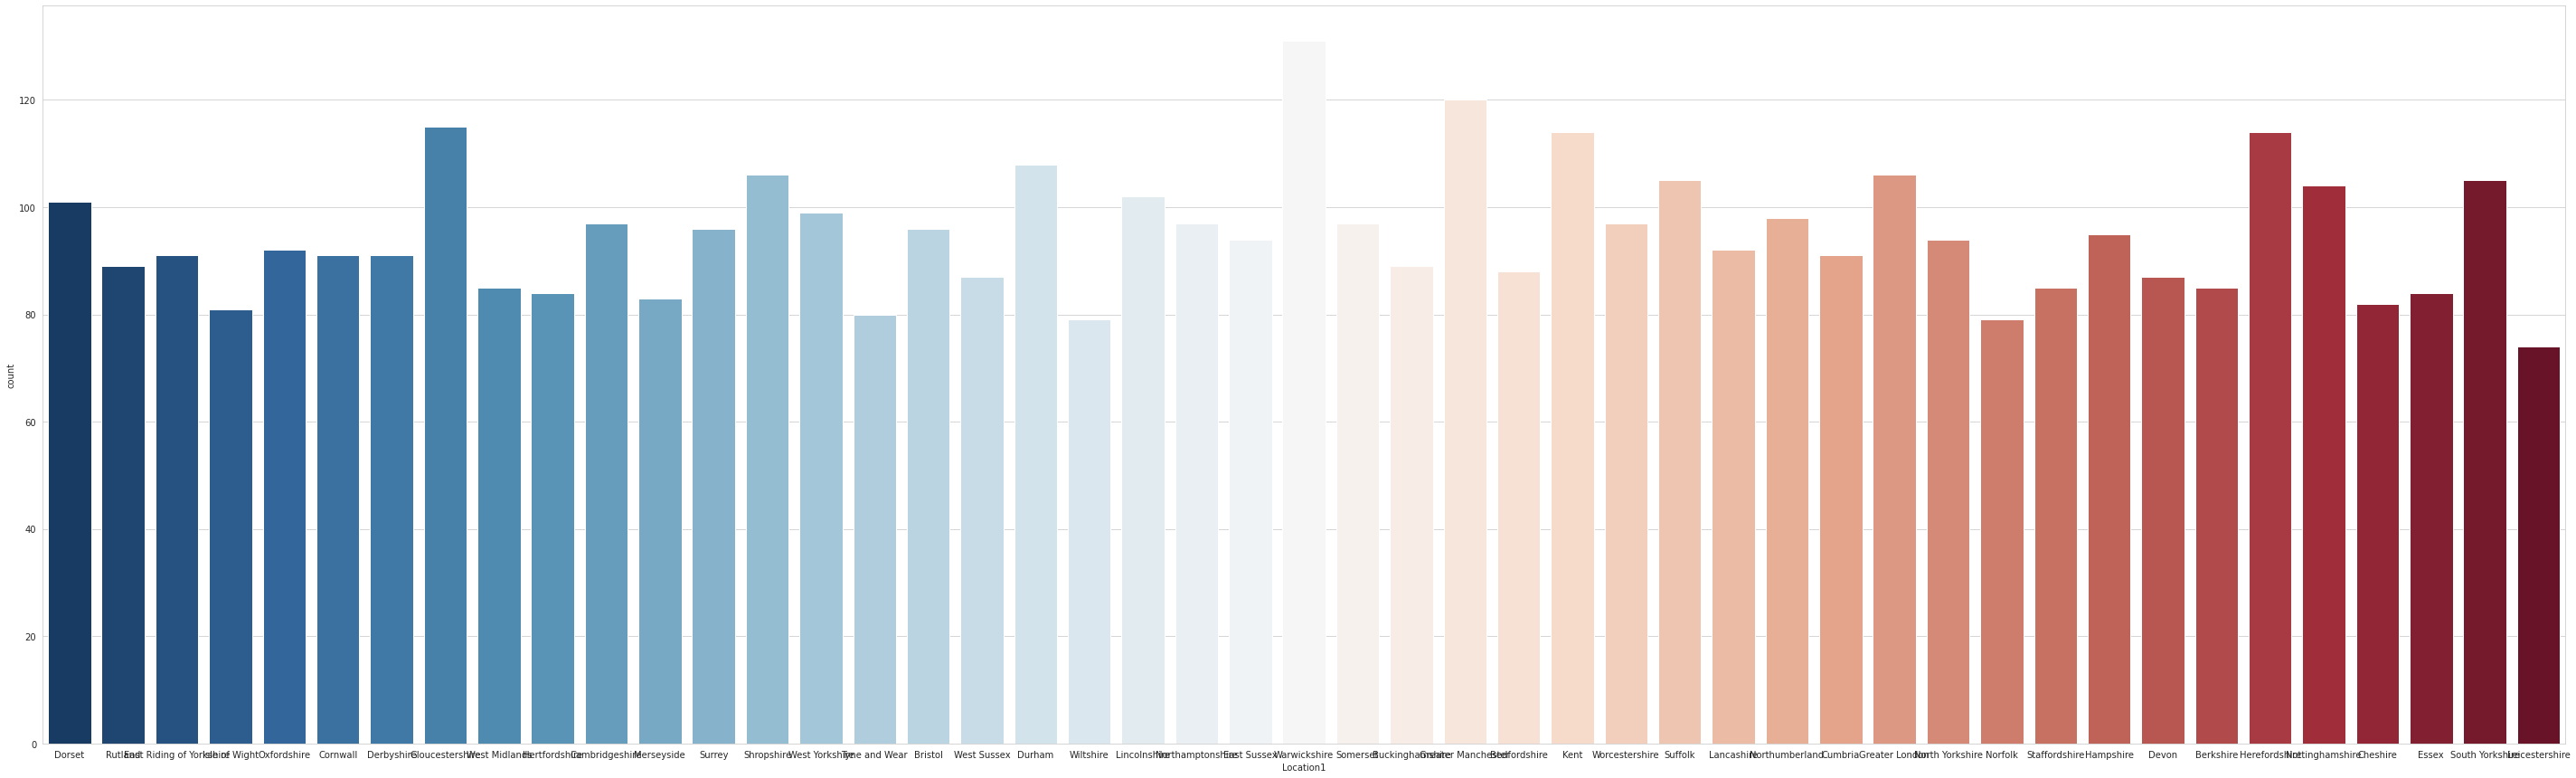

In [ ]:
#  Number of tweets per location
sns.set_style('whitegrid')
plt.figure(figsize=(50,15))
sns.countplot(x='Location1',data=SentihoodLarge,palette='RdBu_r')

In [ ]:
# SentihoodLarge.Location1.value_counts()
highNegLocs.Location1.value_counts()
# highPosLocs.Location1.value_counts()
# From highest to lowest: Active:Warwickshire gen:131 pos:65 - Neg:Gloucestershire gen:115 = Warwickshire 66  - Pos:Kent 80 gen:114

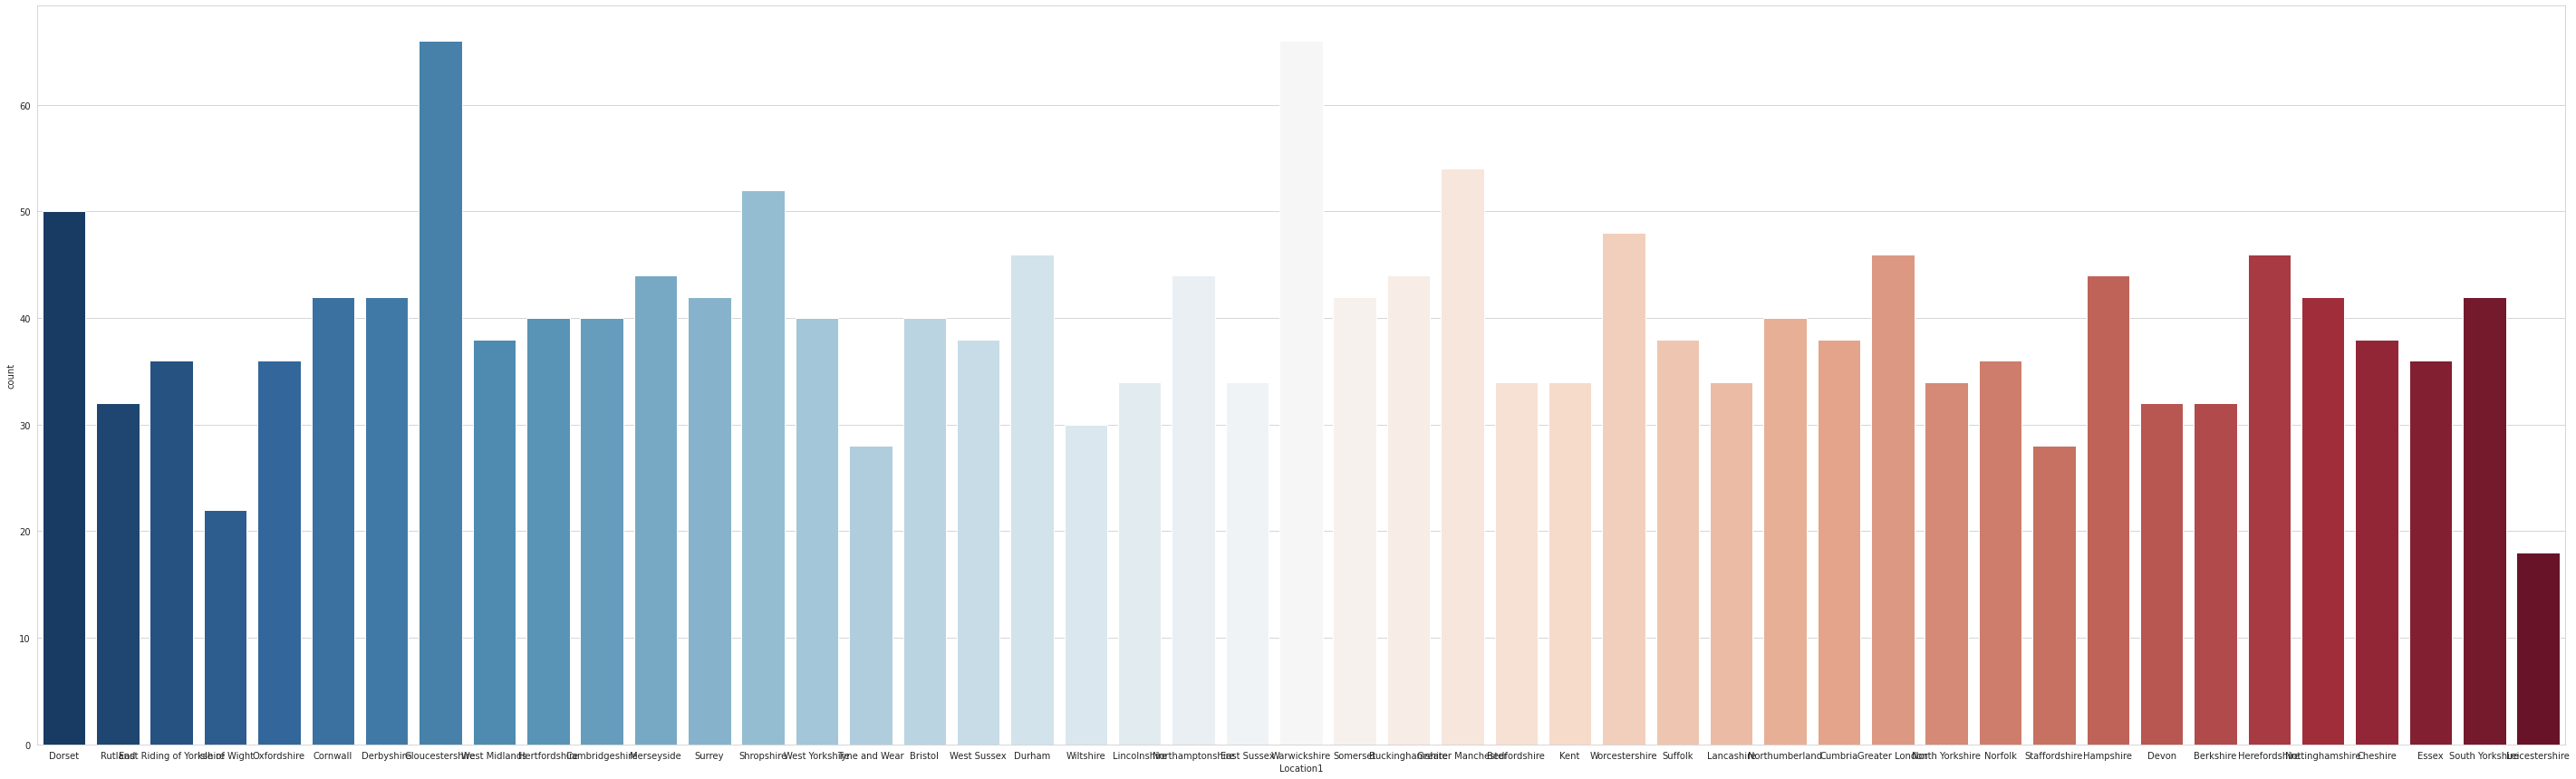

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(50,15))
sns.countplot(x='Location1',data=highNegLocs,palette='RdBu_r')
# highest negative values locations: Neg:Gloucestershire = Warwickshire

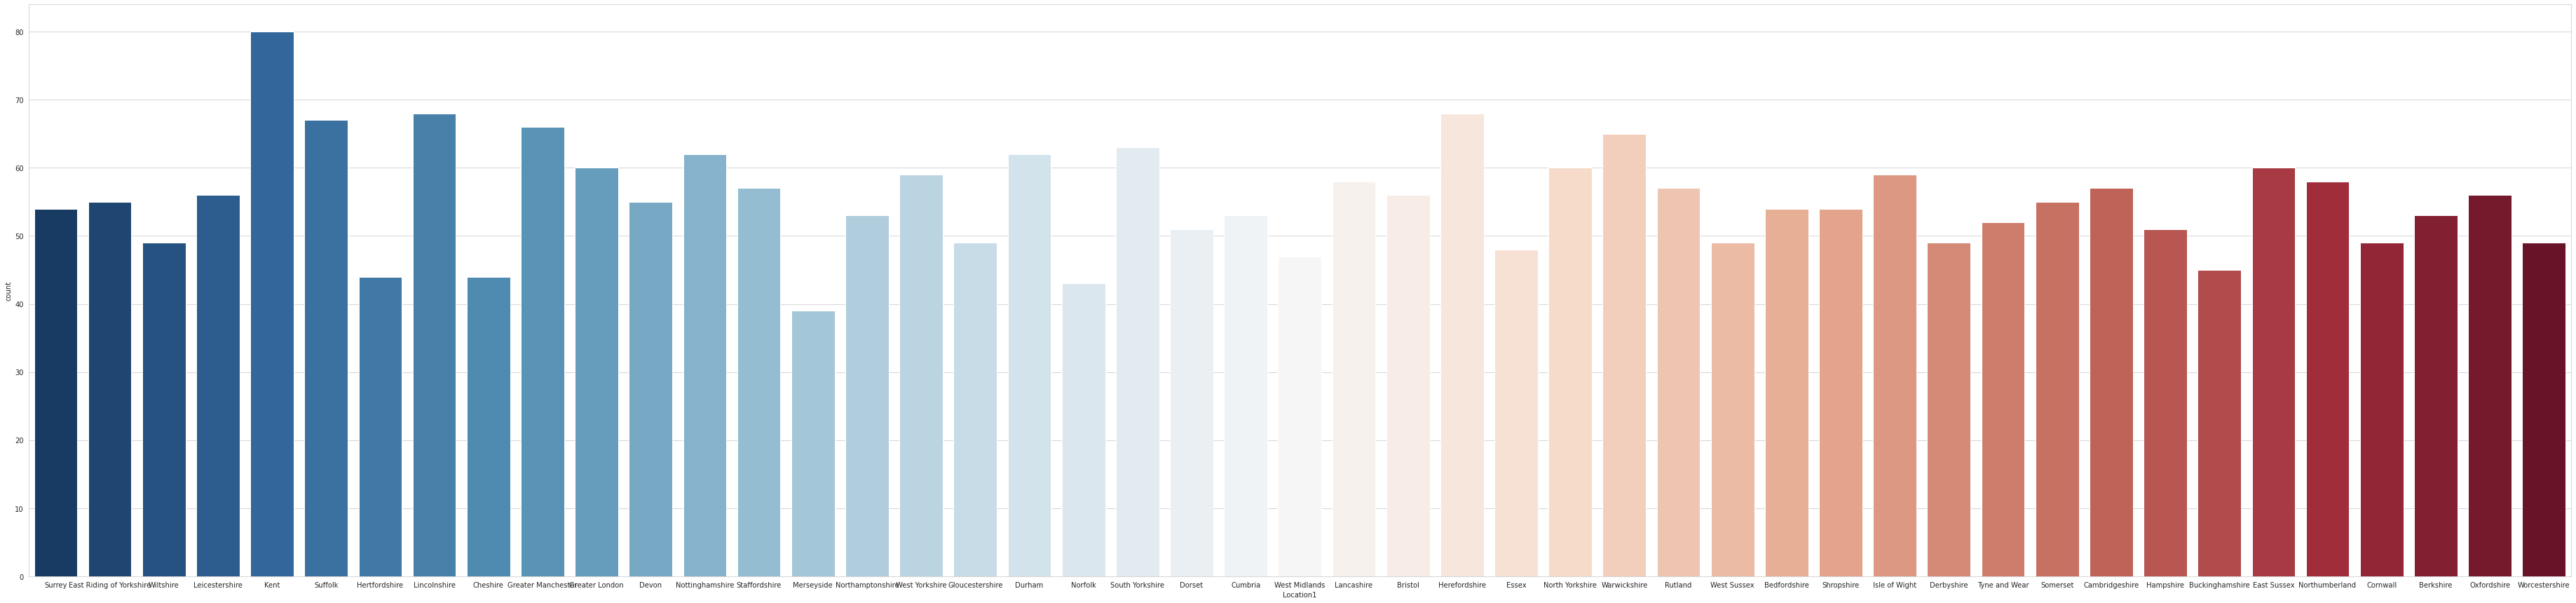

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(65,15))
sns.countplot(x='Location1',data=highPosLocs,palette='RdBu_r')
# highest positive values locations: Kent 

In [ ]:
# Active:Warwickshire gen:131 pos:65 - Neg:Gloucestershire gen:115 = Warwickshire 66  - Pos:Kent 80 gen:114
activePosNeg = pd.DataFrame(SentihoodLarge.loc[SentihoodLarge['Location1'] == 'Warwickshire'])
pos = pd.DataFrame(SentihoodLarge.loc[SentihoodLarge['Location1'] == 'Kent'])
activePosNeg = activePosNeg.append(pos, ignore_index = True)
activePosNeg

In [ ]:
neg = pd.DataFrame(SentihoodLarge.loc[SentihoodLarge['Location1'] == 'Gloucestershire'])
activePosNeg = activePosNeg.append(neg, ignore_index = True)
activePosNeg

Text(0.5, 1.0, 'Most Active Location - Highest No. of Positive Tweets - Highest No. of Negative Tweets')

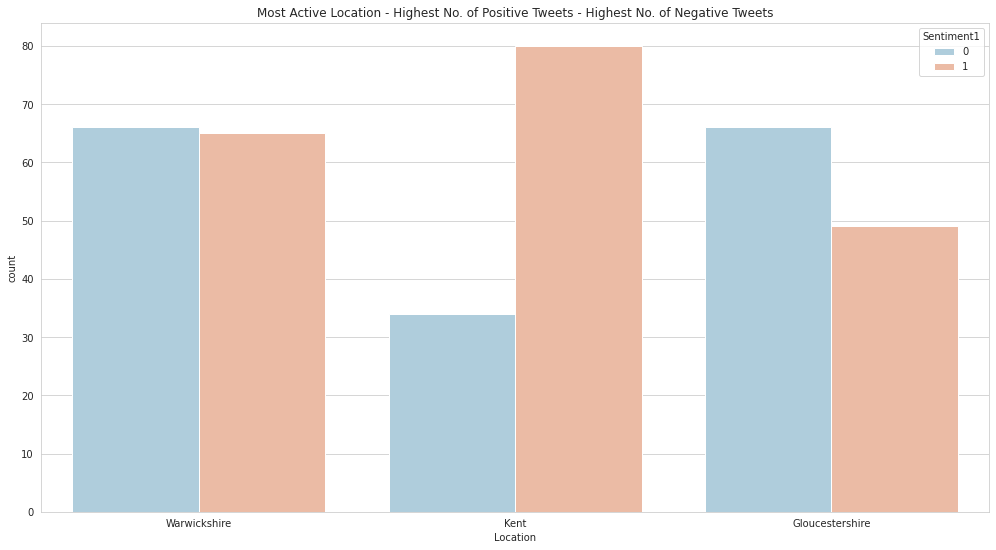

In [ ]:
# Plotting most active - highest no. of positives - highest no. of negatives (Locations)
sns.set_style('whitegrid')
plt.figure(figsize=(17,9))
sns.countplot(x='Location1',hue='Sentiment1',data=activePosNeg,palette='RdBu_r')
plt.xlabel("Location")
plt.title("Most Active Location - Highest No. of Positive Tweets - Highest No. of Negative Tweets")

In [ ]:
# SentihoodLarge.Location1.value_counts() # 117 tweets Durham
# highNegLocs.Location1.value_counts()    # 66 Negative tweets Durham - left: positive: 51
# highPosLocs.Location1.value_counts()    # 71 Buckinghamshire - left: negative: 44
# From highest to lowest: Active:Durham - Neg:Durham - Pos:Buckinghamshire 

In [ ]:
# Plotting most active - highest no. of positives - highest no. of negatives (Locations) overlapping bars (positives and negatives in one bar)
# over time kaman?

In [ ]:
pip install wordcloud

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = SentihoodLarge.OriginalText[0]
text

'Greater Manchester is transforming and the prices will go up and up'

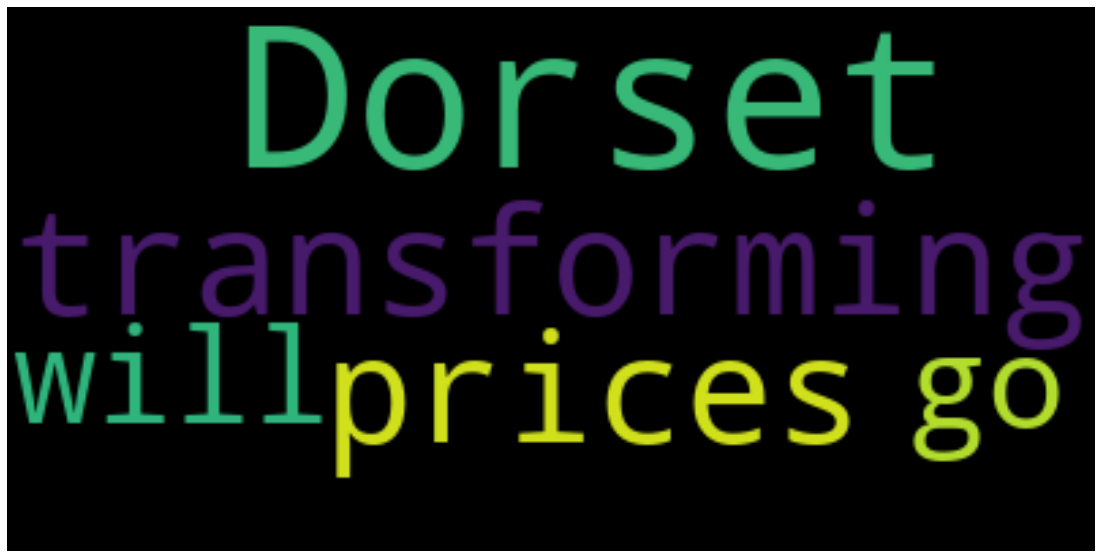

In [ ]:
# Most common words mentioned (Negative - positive - Both together/General)
# Start with one review:
text = SentihoodLarge.OriginalText[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

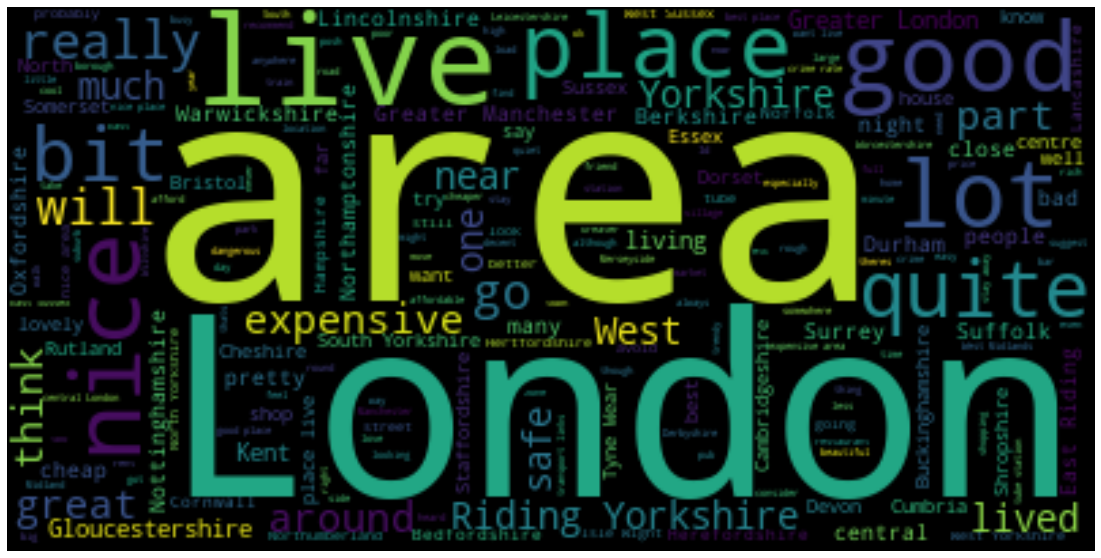

In [ ]:
# Loop over text column + append all to get one big text + apply word cloud
wordCloudText = ""

for index in range(0, len(SentihoodLarge['OriginalText'])):
  wordCloudText += SentihoodLarge.OriginalText[index]
  
wordcloud = WordCloud().generate(wordCloudText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

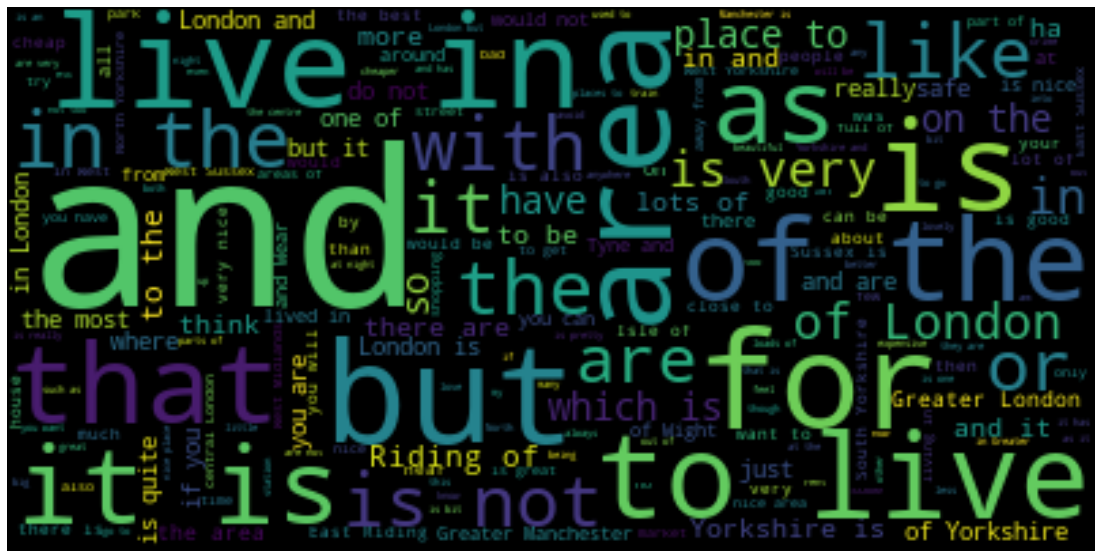

In [ ]:
stopwords= set(england_cities_list)
wordcloud = WordCloud(stopwords=stopwords).generate(wordCloudText)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# after data cleaning and update stopwords with england_cities_list

# Data Cleaning

In [ ]:
SentihoodLarge.Sentiment1.value_counts()

1    2598
0    1862
Name: Sentiment1, dtype: int64

***Normalization***


*   Casing Characters 
*   Negation Handling / Replacing Apostrophes *
*   Split attached words *
*   **Expand abbreviations and slang** *
*   Remove Numbers from Names, Punctuation & special characters
*   Remove white spaces
*   Text canonicalization/standardization *
*   Lemmatization 

In [ ]:
# predicting on the smaller DS
SentihoodLarge = pd.DataFrame(sentihoodReserve)

In [ ]:
#  Casing characters:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(lambda text: text.lower())


# list of abbreviated negations
appos =  { "'d": "would", "'ve": "have", "n't":"not", "'re": "are", "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
 
# function:
def handle_neg(sentence):
  words = sentence.split()
  reformed = [appos[word] if word in appos else word for word in words]
  reformed = " ".join(reformed)
  return reformed

# Applying the function:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(handle_neg)

# splitting fn:
def split_attached(text):
  text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])
  return text

# applying function:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(split_attached)

#  Canonical Fn:
def standarizeFn(tweet):
  # A letter in a word should not be present more than twice in continuation
  tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))

  # Spell check ( not working very well)
  spell = Speller(lang='en')
  tweet = spell(tweet)
  return tweet

# apply:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(standarizeFn)

# Remove Numbers, Punctuation & Special words:

# Punctuations Fn:
def remove_Punct(tweet):
  clean_tweet=[]
  for word in tweet:
      if word not in string.punctuation:
          clean_tweet.append(word)
          reformed = "".join(clean_tweet)
  return reformed

# Applying Fn:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(remove_Punct)

# Remove white spaces (begining and end):
# input_str = " \t a string example\t "
# White Spaces Fn:
def remWhiteSpaces(tweet):
  tweet = tweet.strip()
  return tweet

# Apply Fn:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(remWhiteSpaces)

# Numbers Fn:
def replace_num(tweet):
  tweet = tweet.replace("location1", "locationA")
  tweet = tweet.replace("location2", "locationB")
  return tweet

# Apply
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(replace_num)
SentihoodLarge

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,locationA is transforming and the prices will ...,"[(Dorset, GPE)]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,central london based taxis mostly refuse fares...,"[(Central London, GPE), (Rutland, GPE)]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,do not go looking at places like locationA now...,"[(East Riding of Yorkshire, GPE)]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,for gods sake do not move to locationA its hor...,"[(Isle of Wight, GPE)]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,i dont like locationA at all,"[(Oxfordshire, GPE)]"
...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,we lived in locationA and liked how close it w...,"[(Nottinghamshire, GPE)]"
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,whatever happens in locationA is nonviolent an...,"[(Hampshire, GPE)]"
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,you can live out as far as locationAlocationB ...,"[(Greater London, GPE), (Central London, GPE)]"
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,you live around the locationA station theres a...,"[(Kent, GPE), (National Railway, GPE)]"


In [ ]:
# ignored
#  Shuffle the rows to have a better random representation of negative and positive records
SentihoodLarge = SentihoodLarge.sample(frac = 1)
SentihoodLarge

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,Date
4328,well you could try anything in Bedfordshire ar...,Devon,price,0,Bedfordshire,general,1,well you could try anything in locationB area ...,"[(Bedfordshire, GPE)]",2020-03-09
964,Cornwall for example is a trendy upandcomin...,Cornwall,general,1,NaN,NaN,0,locationA for example is a trendy upandcomi...,"[(Cornwall, GPE)]",2020-12-07
544,Enjoy your time in Buckinghamshire it really i...,Buckinghamshire,general,1,Buckinghamshire,touristy,1,enjoy your time in locationA it really is a fa...,"[(Enjoy, GPE), (World, GPE)]",2020-05-26
2669,Hampshire is really nice if you can afford it,Hampshire,general,1,Hampshire,price,0,locationA is really nice if you can afford it,"[(Hampshire, GPE)]",2020-06-11
3858,Worcestershire is dull,Worcestershire,general,0,NaN,NaN,0,locationA is dull,"[(Worcestershire, GPE)]",2020-09-16
...,...,...,...,...,...,...,...,...,...,...
2915,There is also the history of course because Cu...,Cumbria,touristy,1,NaN,NaN,0,there is also the history of course because lo...,[],2020-12-23
4441,They have a housing system for their schools s...,Kent,price,0,Cambridgeshire,price,0,they have a housing system for their schools s...,"[(Cambridgeshire, GPE), (Kent, GPE)]",2020-01-05
101,Crossrail mainline link between West Yorkshire...,West Yorkshire,transit-location,1,NaN,NaN,0,crosshair mainline link between locationA cent...,"[(Crossrail, GPE), (West Yorkshire, GPE), (Lon...",2020-08-17
3969,Thank you in advance for your help Oxfordshire...,Oxfordshire,price,0,NaN,NaN,0,thank you in advance for your help locationA i...,"[(Thank, GPE), (Oxfordshire, GPE), (Oxfordshir...",2020-03-23


In [ ]:
# ignored
# reset index
SentihoodLarge = SentihoodLarge.reset_index(drop=True)
SentihoodLarge

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText,Date
0,well you could try anything in Bedfordshire ar...,Devon,price,0,Bedfordshire,general,1,well you could try anything in locationB area ...,"[(Bedfordshire, GPE)]",2020-03-09
1,Cornwall for example is a trendy upandcomin...,Cornwall,general,1,NaN,NaN,0,locationA for example is a trendy upandcomi...,"[(Cornwall, GPE)]",2020-12-07
2,Enjoy your time in Buckinghamshire it really i...,Buckinghamshire,general,1,Buckinghamshire,touristy,1,enjoy your time in locationA it really is a fa...,"[(Enjoy, GPE), (World, GPE)]",2020-05-26
3,Hampshire is really nice if you can afford it,Hampshire,general,1,Hampshire,price,0,locationA is really nice if you can afford it,"[(Hampshire, GPE)]",2020-06-11
4,Worcestershire is dull,Worcestershire,general,0,NaN,NaN,0,locationA is dull,"[(Worcestershire, GPE)]",2020-09-16
...,...,...,...,...,...,...,...,...,...,...
4455,There is also the history of course because Cu...,Cumbria,touristy,1,NaN,NaN,0,there is also the history of course because lo...,[],2020-12-23
4456,They have a housing system for their schools s...,Kent,price,0,Cambridgeshire,price,0,they have a housing system for their schools s...,"[(Cambridgeshire, GPE), (Kent, GPE)]",2020-01-05
4457,Crossrail mainline link between West Yorkshire...,West Yorkshire,transit-location,1,NaN,NaN,0,crosshair mainline link between locationA cent...,"[(Crossrail, GPE), (West Yorkshire, GPE), (Lon...",2020-08-17
4458,Thank you in advance for your help Oxfordshire...,Oxfordshire,price,0,NaN,NaN,0,thank you in advance for your help locationA i...,"[(Thank, GPE), (Oxfordshire, GPE), (Oxfordshir...",2020-03-23


In [9]:
# loading the downloaded SentihoodLarge badal ma n-run mn el awel -> for consistent data
SentihoodLarge = pd.read_csv("/content/sample_data/SentihoodLarge.csv")
SentihoodLarge.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,locationA is transforming and the prices will ...,"[('Dorset', 'GPE')]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,central london based taxis mostly refuse fares...,"[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,do not go looking at places like locationA now...,"[('East Riding of Yorkshire', 'GPE')]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,for gods sake do not move to locationA its hor...,"[('Isle of Wight', 'GPE')]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,i dont like locationA at all,"[('Oxfordshire', 'GPE')]"


**Lemmatization**

> 
Gensim lemma takes care of:
*   Casing
*   removal of numerics
*   remove punct, special charact
*   remove stop words
*   POS tagging (Only considers nouns, verbs, adjectives and adverbs by default (all other lemmas are discarded))
Needs: Pattern package installed - applies only to UTF-8 encoded tokens

In [13]:
def lematizing_Fn(tweet):
  lemmatized_sentence = [word.decode('utf-8').split('.')[0] for word in lemmatize(tweet)]
  return lemmatized_sentence

# Applying Fn:
SentihoodLarge['MaskedText'] = SentihoodLarge['MaskedText'].apply(lematizing_Fn)
SentihoodLarge

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,MaskedText,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]"
...,...,...,...,...,...,...,...,...,...
4455,we lived in Nottinghamshire and liked how clos...,Nottinghamshire,shopping,1,NaN,NaN,0,"[live/VB, locationa/NN, like/VB, close/JJ, be/...","[('Nottinghamshire', 'GPE')]"
4456,whatever happens in Hampshire is nonviolent an...,Hampshire,safety,1,NaN,NaN,0,"[happen/VB, locationa/NN, be/VB, nonviolent/JJ...","[('Hampshire', 'GPE')]"
4457,you can live out as far as CambridgeshireEast ...,East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,"[live/VB, out/RB, far/RB, be/VB, edge/NN, grea...","[('Greater London', 'GPE'), ('Central London',..."
4458,you live around the Kent station theres a Nati...,Kent,transit-location,1,NaN,NaN,0,"[live/VB, locationa/JJ, station/NN, there/VB, ...","[('Kent', 'GPE'), ('National Railway', 'GPE')]"


In [14]:
SentihoodLarge = SentihoodLarge.rename(columns={"MaskedText":"Lemma_Tags"})
SentihoodLarge.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]"


In [15]:
# seperate words and tags:
def separate_word_tag(lemmWTags):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in lemmWTags:
        sent = []
        type_ =[]
        for word in row:
            split = word.split('/')
            sent.append(split[0])
            type_.append(split[1])
        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))
    df['lem_words']= words
    df['lem_tag']= types
    return df

lemma_separated = SentihoodLarge['Lemma_Tags']
lemma_separated = separate_word_tag(lemma_separated)
lemma_separated

,lem_words,lem_tag
0,locationa be transform price go up,NN VB VB NN VB RB
1,central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN
2,do not go look place locationa now be rough ar...,VB RB VB VB NN NN RB VB JJ NN RB RB VB VB
3,god sake do not move locationa horrible,NN NN VB RB VB VB JJ
4,dont locationa,VB NN
...,...,...
4455,live locationa like close be shop,VB NN VB JJ VB NN
4456,happen locationa be nonviolent relatively islamic,VB NN VB JJ RB JJ
4457,live out far be edge greater london only take ...,VB RB RB VB NN JJ NN RB VB NN NN VB RB JJ NN
4458,live locationa station there national railway ...,VB JJ NN VB JJ NN NN VB RB VB NN


In [16]:
# concat cleaned text with original
sentihoodClean = pd.concat([SentihoodLarge, lemma_separated], axis=1)
sentihoodClean.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText,lem_words,lem_tag
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]",locationa be transform price go up,NN VB VB NN VB RB
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]",central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]",do not go look place locationa now be rough ar...,VB RB VB VB NN NN RB VB JJ NN RB RB VB VB
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]",god sake do not move locationa horrible,NN NN VB RB VB VB JJ
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]",dont locationa,VB NN


In [17]:
def tokenize_for_vec(tweet):    
    tokenized = word_tokenize(tweet)
    return tokenized

tokenized_lem_words = sentihoodClean['lem_words']
tokenized_lem_words = tokenized_lem_words.apply(tokenize_for_vec)
tokenized_lem_words.head()

0            [locationa, be, transform, price, go, up]
1    [central, london, base, taxi, mostly, refuse, ...
2    [do, not, go, look, place, locationa, now, be,...
3      [god, sake, do, not, move, locationa, horrible]
4                                    [dont, locationa]
Name: lem_words, dtype: object

In [18]:
sentihoodFinal = sentihoodClean
sentihoodClean = sentihoodClean.rename(columns={"lem_words":"lemm_full_words"})
sentihoodFinal = pd.concat([sentihoodClean, tokenized_lem_words], axis=1)
sentihoodFinal.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText,lemm_full_words,lem_tag,lem_words
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]",locationa be transform price go up,NN VB VB NN VB RB,"[locationa, be, transform, price, go, up]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]",central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN,"[central, london, base, taxi, mostly, refuse, ..."
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]",do not go look place locationa now be rough ar...,VB RB VB VB NN NN RB VB JJ NN RB RB VB VB,"[do, not, go, look, place, locationa, now, be,..."
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]",god sake do not move locationa horrible,NN NN VB RB VB VB JJ,"[god, sake, do, not, move, locationa, horrible]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]",dont locationa,VB NN,"[dont, locationa]"


In [ ]:
from collections import Counter
Counter(" ".join(sentihoodFinal['lemm_full_words']).split()).most_common(100)

In [20]:
sentences = []
for sent in sentihoodFinal['lem_words']:
  sentences.append(sent)
sentences

[['locationa', 'be', 'transform', 'price', 'go', 'up'],
 ['central',
  'london',
  'base',
  'taxi',
  'mostly',
  'refuse',
  'fare',
  'suburban',
  'area',
  'locationa'],
 ['do',
  'not',
  'go',
  'look',
  'place',
  'locationa',
  'now',
  'be',
  'rough',
  'area',
  'really',
  'not',
  'want',
  'live'],
 ['god', 'sake', 'do', 'not', 'move', 'locationa', 'horrible'],
 ['dont', 'locationa'],
 ['liv',
  'locationa',
  'locationb',
  'be',
  'place',
  'lot',
  'violence',
  'happen',
  'div',
  'gang'],
 ['live',
  'locationa',
  'year',
  'be',
  'rough',
  'be',
  'close',
  'centre',
  'town',
  'so',
  'cheap'],
 ['say', 'locationa', 'locationb', 'have', 'money'],
 ['stay', 'away', 'locationa'],
 ['locationa', 'aint', 'too', 'bad'],
 ['locationa', 'be', 'drug', 'tourist'],
 ['locationa',
  'be',
  'more',
  'expensive',
  'london',
  'be',
  'good',
  'local',
  'school'],
 ['locationa',
  'be',
  'not',
  'dangerous',
  'be',
  'ugly',
  'humble',
  'concrete',
  'characte

# CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Logistic Regression Model

***Location masking predictions:***

***Spliting data into training data and testing data***

In [22]:
x = sentihoodFinal.lemm_full_words.values
y = sentihoodFinal.Sentiment1.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=32)

In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Evaluation

In [ ]:
sentihoodFinal.count()

In [25]:
classifier = LogisticRegression()#max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8482810164424515


In [26]:
# Calculating the score of the predictions
score = classifier.score(X_train[:2893], y_train[:2893]) # Return the mean accuracy on the given test data and labels
print("Accuracy:", score)

Accuracy: 0.9253370203940546


*Confussion Matrix:*

In [27]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=sentihoodFinal.Sentiment1.unique())
df_cm = pd.DataFrame(cm, index=sentihoodFinal.Sentiment1.unique(), columns=sentihoodFinal.Sentiment1.unique())
df_cm

,0,1
0,441,102
1,101,694


In [28]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,0,1
0,0.813653,0.128141
1,0.186347,0.871859


*Classification Report:*

In [29]:
predi = classifier.predict(X_test)

In [31]:
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       543
           1       0.87      0.87      0.87       795

    accuracy                           0.85      1338
   macro avg       0.84      0.84      0.84      1338
weighted avg       0.85      0.85      0.85      1338



In [ ]:
sentihoodFinal

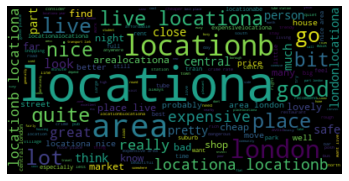

In [34]:
# Loop over text column + append all to get one big text + apply word cloud
wordCloudText = ""

for index in range(0, len(sentihoodFinal['lemm_full_words'])):
  wordCloudText += sentihoodFinal.lemm_full_words[index]

wordcloud = WordCloud().generate(wordCloudText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

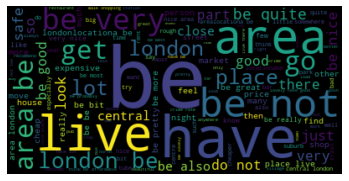

In [35]:
stopwords= set(["locationb", "locationa"])
wordcloud = WordCloud(stopwords=stopwords).generate(wordCloudText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# No Loc Mask --------------------------------------------------------------------------------------------

In [36]:
SentihoodFinalLoc = pd.DataFrame(sentihoodFinal)
SentihoodFinalLoc.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText,lemm_full_words,lem_tag,lem_words
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]",locationa be transform price go up,NN VB VB NN VB RB,"[locationa, be, transform, price, go, up]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]",central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN,"[central, london, base, taxi, mostly, refuse, ..."
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]",do not go look place locationa now be rough ar...,VB RB VB VB NN NN RB VB JJ NN RB RB VB VB,"[do, not, go, look, place, locationa, now, be,..."
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]",god sake do not move locationa horrible,NN NN VB RB VB VB JJ,"[god, sake, do, not, move, locationa, horrible]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]",dont locationa,VB NN,"[dont, locationa]"


In [37]:
SentihoodFinalLoc.drop('lem_tag',axis=1,inplace=True)
SentihoodFinalLoc.drop('lemm_full_words',axis=1,inplace=True)
SentihoodFinalLoc.drop('lem_words',axis=1,inplace=True)

In [38]:
SentihoodFinalLoc.head()

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText
0,Dorset is transforming and the prices will go ...,Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]"
1,Central London based taxis mostly refuse fares...,Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,Dont go looking at places like East Riding of ...,East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]"
3,For gods sake do not move to Isle of Wight its...,Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]"
4,I dont like Oxfordshire at all,Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]"


In [39]:
SentihoodFinalLoc['OriginalText'] = SentihoodFinalLoc['OriginalText'].apply(lematizing_Fn)
SentihoodFinalLoc

,OriginalText,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText
0,"[dorset/NN, be/VB, transform/VB, price/NN, go/...",Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]"
1,"[central/JJ, london/NN, base/VB, taxi/NN, most...",Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,"[dont/VB, go/VB, look/VB, place/NN, east/JJ, r...",East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]"
3,"[god/NN, sake/NN, do/VB, not/RB, move/VB, isle...",Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]"
4,"[dont/VB, oxfordshire/NN]",Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]"
...,...,...,...,...,...,...,...,...,...
4455,"[live/VB, nottinghamshire/NN, like/VB, close/J...",Nottinghamshire,shopping,1,NaN,NaN,0,"[live/VB, locationa/NN, like/VB, close/JJ, be/...","[('Nottinghamshire', 'GPE')]"
4456,"[happen/VB, hampshire/NN, be/VB, nonviolent/JJ...",Hampshire,safety,1,NaN,NaN,0,"[happen/VB, locationa/NN, be/VB, nonviolent/JJ...","[('Hampshire', 'GPE')]"
4457,"[live/VB, out/RB, far/RB, riding/NN, yorkshire...",East Riding of Yorkshire,transit-location,1,Cambridgeshire,transit-location,1,"[live/VB, out/RB, far/RB, be/VB, edge/NN, grea...","[('Greater London', 'GPE'), ('Central London',..."
4458,"[live/VB, kent/NN, station/NN, there/VB, natio...",Kent,transit-location,1,NaN,NaN,0,"[live/VB, locationa/JJ, station/NN, there/VB, ...","[('Kent', 'GPE'), ('National Railway', 'GPE')]"


In [40]:
SentihoodFinalLoc = SentihoodFinalLoc.rename(columns={"OriginalText":"Lemma_TagsOrig"})
SentihoodFinalLoc.head()

,Lemma_TagsOrig,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText
0,"[dorset/NN, be/VB, transform/VB, price/NN, go/...",Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]"
1,"[central/JJ, london/NN, base/VB, taxi/NN, most...",Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]"
2,"[dont/VB, go/VB, look/VB, place/NN, east/JJ, r...",East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]"
3,"[god/NN, sake/NN, do/VB, not/RB, move/VB, isle...",Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]"
4,"[dont/VB, oxfordshire/NN]",Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]"


In [41]:
lemma_separated2 = SentihoodFinalLoc['Lemma_TagsOrig']
lemma_separated2 = separate_word_tag(lemma_separated2)
lemma_separated2

,lem_words,lem_tag
0,dorset be transform price go up,NN VB VB NN VB RB
1,central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN
2,dont go look place east riding yorkshire now b...,VB VB VB NN JJ NN NN RB VB JJ NN RB RB VB VB
3,god sake do not move isle horrible,NN NN VB RB VB NN JJ
4,dont oxfordshire,VB NN
...,...,...
4455,live nottinghamshire like close be shop,VB NN VB JJ VB NN
4456,happen hampshire be nonviolent relativly unisl...,VB NN VB JJ JJ JJ
4457,live out far riding yorkshire be edge greater ...,VB RB RB NN NN VB NN JJ NN RB VB NN NN VB RB J...
4458,live kent station there national railway route...,VB NN NN VB JJ NN NN VB RB VB NN


In [42]:
# concat cleaned text with original
SentihoodFinalLoc = pd.concat([SentihoodFinalLoc, lemma_separated2], axis=1)
SentihoodFinalLoc.head()

,Lemma_TagsOrig,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText,lem_words,lem_tag
0,"[dorset/NN, be/VB, transform/VB, price/NN, go/...",Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]",dorset be transform price go up,NN VB VB NN VB RB
1,"[central/JJ, london/NN, base/VB, taxi/NN, most...",Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]",central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN
2,"[dont/VB, go/VB, look/VB, place/NN, east/JJ, r...",East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]",dont go look place east riding yorkshire now b...,VB VB VB NN JJ NN NN RB VB JJ NN RB RB VB VB
3,"[god/NN, sake/NN, do/VB, not/RB, move/VB, isle...",Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]",god sake do not move isle horrible,NN NN VB RB VB NN JJ
4,"[dont/VB, oxfordshire/NN]",Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]",dont oxfordshire,VB NN


In [43]:
tokenized_lem_words2 = SentihoodFinalLoc['lem_words']
tokenized_lem_words2 = tokenized_lem_words2.apply(tokenize_for_vec)
tokenized_lem_words2.head()

0               [dorset, be, transform, price, go, up]
1    [central, london, base, taxi, mostly, refuse, ...
2    [dont, go, look, place, east, riding, yorkshir...
3           [god, sake, do, not, move, isle, horrible]
4                                  [dont, oxfordshire]
Name: lem_words, dtype: object

In [44]:
sentihoodFinal2 = SentihoodFinalLoc
SentihoodFinalLoc = SentihoodFinalLoc.rename(columns={"lem_words":"lemm_full_words"})
sentihoodFinal2 = pd.concat([SentihoodFinalLoc, tokenized_lem_words2], axis=1)
sentihoodFinal2.head()

,Lemma_TagsOrig,Location1,Aspect1,Sentiment1,Location2,Aspect2,Sentiment2,Lemma_Tags,LocationsInText,lemm_full_words,lem_tag,lem_words
0,"[dorset/NN, be/VB, transform/VB, price/NN, go/...",Dorset,price,0,NaN,NaN,0,"[locationa/NN, be/VB, transform/VB, price/NN, ...","[('Dorset', 'GPE')]",dorset be transform price go up,NN VB VB NN VB RB,"[dorset, be, transform, price, go, up]"
1,"[central/JJ, london/NN, base/VB, taxi/NN, most...",Rutland,transit-location,0,NaN,NaN,0,"[central/JJ, london/NN, base/VB, taxi/NN, most...","[('Central London', 'GPE'), ('Rutland', 'GPE')]",central london base taxi mostly refuse fare su...,JJ NN VB NN RB JJ NN JJ NN NN,"[central, london, base, taxi, mostly, refuse, ..."
2,"[dont/VB, go/VB, look/VB, place/NN, east/JJ, r...",East Riding of Yorkshire,general,0,East Riding of Yorkshire,live,0,"[do/VB, not/RB, go/VB, look/VB, place/NN, loca...","[('East Riding of Yorkshire', 'GPE')]",dont go look place east riding yorkshire now b...,VB VB VB NN JJ NN NN RB VB JJ NN RB RB VB VB,"[dont, go, look, place, east, riding, yorkshir..."
3,"[god/NN, sake/NN, do/VB, not/RB, move/VB, isle...",Isle of Wight,general,0,NaN,NaN,0,"[god/NN, sake/NN, do/VB, not/RB, move/VB, loca...","[('Isle of Wight', 'GPE')]",god sake do not move isle horrible,NN NN VB RB VB NN JJ,"[god, sake, do, not, move, isle, horrible]"
4,"[dont/VB, oxfordshire/NN]",Oxfordshire,general,0,NaN,NaN,0,"[dont/VB, locationa/NN]","[('Oxfordshire', 'GPE')]",dont oxfordshire,VB NN,"[dont, oxfordshire]"


In [ ]:
from collections import Counter
Counter(" ".join(sentihoodFinal2['lemm_full_words']).split()).most_common(100)

LR for no loc mask:

In [46]:
x = sentihoodFinal2.lemm_full_words.values
y = sentihoodFinal2.Sentiment1.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=32)

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

Evaluation:

In [47]:
classifier = LogisticRegression()#max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8325859491778774


In [48]:
# Calculating the score of the predictions
score = classifier.score(X_train[:2893], y_train[:2893]) # Return the mean accuracy on the given test data and labels
print("Accuracy:", score)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=sentihoodFinal2.Sentiment1.unique())
df_cm = pd.DataFrame(cm, index=sentihoodFinal2.Sentiment1.unique(), columns=sentihoodFinal2.Sentiment1.unique())
df_cm

df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

print(df_cm_percentage)

predi = classifier.predict(X_test)
print(classification_report(y_test, predi))

Accuracy: 0.9287936398202558
          0         1
0  0.798131  0.144458
1  0.201869  0.855542
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       543
           1       0.86      0.86      0.86       795

    accuracy                           0.83      1338
   macro avg       0.83      0.83      0.83      1338
weighted avg       0.83      0.83      0.83      1338



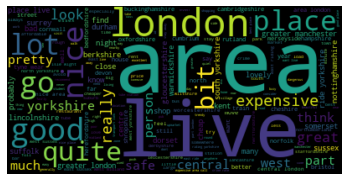

In [49]:
# Loop over text column + append all to get one big text + apply word cloud
wordCloudText = ""

for index in range(0, len(sentihoodFinal2['lemm_full_words'])):
  wordCloudText += sentihoodFinal2.lemm_full_words[index]
  
# stopwords= set(england_cities_list)
# wordcloud = WordCloud(stopwords=stopwords).generate(wordCloudText)

wordcloud = WordCloud().generate(wordCloudText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Aspect extraction using Topic Modeling

In [ ]:
pip install pyLDAvis

In [ ]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# import pyLDAvis.gensim #LDA visualization library

# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

In [ ]:
#create dictionary
dictionary = corpora.Dictionary(sentihoodFinal2['lem_words'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

41124


In [ ]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in sentihoodFinal2['lem_words'] ]
print(len(doc_term_matrix))

4460


In [ ]:
#  Fit LDA model on the dataset
# ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=12, random_state=100, update_every=1, chunksize=100, passes=10, alpha="auto")

In [ ]:
# Print the topics identified by LDA model
ldamodel.print_topics(num_topics=num_topics)

In [ ]:
# Visualize the LDA model results
# lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.enable_notebook()
lda_viz = pyLDAvis.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds', R=30)
lda_viz

#Sentiment Analysis on Twitter Data:

importing datasets:

In [50]:
def generate_Location(location):
  loc = location
  return loc

In [51]:
Brussel = pd.read_csv("/content/sample_data/BrusselBelgiumKeyCity.csv")#, error_bad_lines=False)

In [52]:
Brussel = Brussel[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [53]:
Brussel['location'] = Brussel['tweet'].apply(lambda x: 'Brussel')
Brussel

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:54:02 EET,2021-07-23,NaN,@DannyHarris_TA Don't come to Brussels… https...,en,[],NaN,NaN,Brussel
1,2021-07-23 16:53:00 EET,2021-07-23,NaN,@torfsrik denk u nu echt dat ze in Brussel ge...,nl,[],NaN,NaN,Brussel
2,2021-07-23 16:51:03 EET,2021-07-23,NaN,Het Franse plan van 1831: de Kempen bij Nederl...,nl,[],NaN,NaN,Brussel
3,2021-07-23 16:48:53 EET,2021-07-23,NaN,@pvmaele In Brussel stad kunnen ze de voetgang...,nl,[],NaN,NaN,Brussel
4,2021-07-23 16:48:48 EET,2021-07-23,NaN,Op de #R0 buitenring rond Brussel 20 min fileg...,nl,['r0'],NaN,NaN,Brussel
...,...,...,...,...,...,...,...,...,...
4489,2021-07-18 17:21:23 EET,2021-07-18,NaN,If you would let the one that injects you sign...,en,"['ugent', 'gent', 'vub', 'brussel', 'kul', 'le...",NaN,NaN,Brussel
4490,2021-07-18 17:20:24 EET,2021-07-18,NaN,GEZOCHT: Fullstack .NET developer in Brussel -...,nl,[],NaN,NaN,Brussel
4491,2021-07-18 17:19:44 EET,2021-07-18,NaN,@spijker86 Alleen al de frequente verhuis van ...,nl,[],NaN,NaN,Brussel
4492,2021-07-18 17:17:37 EET,2021-07-18,NaN,@biekepurnelle Ten noorden van Brussel makkeli...,nl,[],NaN,NaN,Brussel


In [54]:
Toronto = pd.read_csv("/content/sample_data/TorontoCanadaKeyCity.csv")

In [55]:
Toronto = Toronto[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [56]:
Toronto['location'] = Toronto['tweet'].apply(lambda x: 'Toronto')
Toronto

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:17 EET,2021-07-23,NaN,@RahRahRaina Instantly this became my fave alb...,en,[],NaN,NaN,Toronto
1,2021-07-23 16:55:05 EET,2021-07-23,NaN,"Here's my review of PIG for @mrwillw, which op...",en,['pigmovie'],NaN,NaN,Toronto
2,2021-07-23 16:55:04 EET,2021-07-23,NaN,"Toronto's Keys N Krates Drop Tropical Banger ""...",en,[],NaN,NaN,Toronto
3,2021-07-23 16:55:02 EET,2021-07-23,NaN,@TheColbyD @EdwardEmerling @PFF THe boston bea...,en,[],NaN,NaN,Toronto
4,2021-07-23 16:55:01 EET,2021-07-23,NaN,@encyclodeezy Toronto is Dope… but we all work...,en,[],NaN,NaN,Toronto
...,...,...,...,...,...,...,...,...,...
4429,2021-07-23 03:16:21 EET,2021-07-23,NaN,"@PirateSnatch @holycity15 @drandrewb Ah yes, 2...",en,[],NaN,NaN,Toronto
4430,2021-07-23 03:16:20 EET,2021-07-23,NaN,Toronto police made ‘series of mistakes’ while...,en,[],NaN,NaN,Toronto
4431,2021-07-23 03:16:05 EET,2021-07-23,"{'type': 'Point', 'coordinates': [43.6410174, ...",Medical [Old Toronto] Toronto ON M6J Dispatche...,en,[],NaN,NaN,Toronto
4432,2021-07-23 03:16:05 EET,2021-07-23,"{'type': 'Point', 'coordinates': [43.6410174, ...",Medical [Old Toronto] Toronto ON M6J Dispatche...,en,[],NaN,NaN,Toronto


In [57]:
Montreal = pd.read_csv("/content/sample_data/MontrealCanadaKeyCity.csv")

In [58]:
Montreal = Montreal[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [59]:
Montreal['location'] = Montreal['tweet'].apply(lambda x: 'Montreal')
Montreal

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:09 EET,2021-07-23,NaN,"“Help, someone ween me off sugar!” Chocolate-h...",en,"['montreal', 'villesaintlaurent', 'vsl', 'marc...",NaN,NaN,Montreal
1,2021-07-23 16:54:58 EET,2021-07-23,NaN,@CitImmCanada I am currently working in Montre...,en,[],NaN,NaN,Montreal
2,2021-07-23 16:54:39 EET,2021-07-23,NaN,Desde que tengo uso de razón veo los #JuegosOl...,es,"['juegosolimpicos', 'tokio2020']",NaN,NaN,Montreal
3,2021-07-23 16:54:39 EET,2021-07-23,NaN,It's a beautiful day on @AvenueMontRoyal 🌞 📷 @...,en,"['mtlmoments', 'plateau', 'summer', 'pedestria...",NaN,NaN,Montreal
4,2021-07-23 16:54:12 EET,2021-07-23,NaN,‘Something romantic’: Montreal barbers seek ki...,en,[],NaN,NaN,Montreal
...,...,...,...,...,...,...,...,...,...
4733,2021-07-22 19:44:33 EET,2021-07-22,NaN,@akimlinger Montreal? Lol,en,[],NaN,NaN,Montreal
4734,2021-07-22 19:44:24 EET,2021-07-22,NaN,Recherche d'images en cette journée tranquille...,fr,"['rcinfo', 'urbain', 'chum', 'siteglen', 'art'...",NaN,NaN,Montreal
4735,2021-07-22 19:44:00 EET,2021-07-22,NaN,A team that felt the Canadiens didn’t “respect...,en,[],NaN,NaN,Montreal
4736,2021-07-22 19:43:49 EET,2021-07-22,NaN,@dreamzz_kidd Hopefully Montreal or Winnipeg o...,en,[],NaN,NaN,Montreal


In [60]:
Vancouver = pd.read_csv("/content/sample_data/VancouverCanadaKeyCity.csv")

In [61]:
Vancouver = Vancouver[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [62]:
Vancouver['location'] = Vancouver['tweet'].apply(lambda x: 'Vancouver')
Vancouver

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:54:30 EET,2021-07-23,NaN,@RadioCanadaInfo Et l'équipe de Vancouver cont...,fr,[],NaN,NaN,Vancouver
1,2021-07-23 16:54:11 EET,2021-07-23,NaN,Lmao woke up to Raptors fans saying our parade...,en,[],NaN,NaN,Vancouver
2,2021-07-23 16:54:00 EET,2021-07-23,NaN,Nobody likes Vancouver couldn’t of displayed a...,en,[],NaN,NaN,Vancouver
3,2021-07-23 16:53:55 EET,2021-07-23,NaN,What a special treat to visit the archaeologic...,en,['gocougs'],NaN,NaN,Vancouver
4,2021-07-23 16:53:47 EET,2021-07-23,NaN,Aeroporto di Vancouver🇨🇦 https://t.co/YCuax2Z5PU,it,[],NaN,NaN,Vancouver
...,...,...,...,...,...,...,...,...,...
4395,2021-07-22 19:38:54 EET,2021-07-22,NaN,Enter for a chance to win Vancouver! Win a Cor...,en,[],NaN,NaN,Vancouver
4396,2021-07-22 19:38:50 EET,2021-07-22,NaN,@StephenPunwasi when did you move to Vancouver...,en,[],NaN,NaN,Vancouver
4397,2021-07-22 19:38:26 EET,2021-07-22,NaN,"About #SuperHeroDay 🎬 ""Believe in yourself, yo...",en,"['superheroday', 'heroproject', 'marvelmade', ...",NaN,NaN,Vancouver
4398,2021-07-22 19:38:24 EET,2021-07-22,NaN,@wallyplscore Real win = exposing the frauds k...,en,[],NaN,NaN,Vancouver


In [63]:
Helsinki = pd.read_csv("/content/sample_data/HelsinkiFinlandKeyCity.csv")

In [64]:
Helsinki = Helsinki[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [65]:
Helsinki['location'] = Helsinki['tweet'].apply(lambda x: 'Helsinki')
Helsinki

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:54:26 EET,2021-07-23,NaN,@beerglows so sei a frase da nairobi cojones h...,es,[],NaN,NaN,Helsinki
1,2021-07-23 16:54:19 EET,2021-07-23,NaN,considering traitor trump had access to daily ...,en,[],NaN,NaN,Helsinki
2,2021-07-23 16:53:31 EET,2021-07-23,NaN,@GuarioCandanga En medio de los juegos de ese ...,es,[],NaN,NaN,Helsinki
3,2021-07-23 16:53:03 EET,2021-07-23,NaN,@jindrichsidlo Helsinki 1952,is,[],NaN,NaN,Helsinki
4,2021-07-23 16:52:52 EET,2021-07-23,NaN,"Ylikoski Maria HKM, 08.09.1999: Salibandyharjo...",fi,[],NaN,NaN,Helsinki
...,...,...,...,...,...,...,...,...,...
4322,2021-07-20 18:22:43 EET,2021-07-20,NaN,Helsinki is Hell. 😳 Ich werde später YouTube b...,de,['gefragtgejagt'],NaN,NaN,Helsinki
4323,2021-07-20 18:22:02 EET,2021-07-20,NaN,Teemme juttua: Kerro meille tämän kesän parhaa...,fi,[],NaN,NaN,Helsinki
4324,2021-07-20 18:21:03 EET,2021-07-20,NaN,Rip.Uli war Helsinki is Hell - Hape Kerkeling....,nl,"['gefragtgejagt', 'daserste', 'gg']",NaN,NaN,Helsinki
4325,2021-07-20 18:19:48 EET,2021-07-20,NaN,JE SUIS STAR,fr,[],NaN,NaN,Helsinki


In [66]:
Paris = pd.read_csv("/content/sample_data/ParisFranceKeyCity.csv")

In [67]:
Paris = Paris[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [68]:
Paris['location'] = Paris['tweet'].apply(lambda x: 'Paris')
Paris

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:23 EET,2021-07-23,NaN,@Djemklc İyi yetiştirilirlerse Paris’ten madal...,tr,[],NaN,NaN,Paris
1,2021-07-23 16:55:23 EET,2021-07-23,NaN,"Cristiano, ¿rumbo a París? ⚽🤩🇫🇷 Parece ser qu...",es,[],NaN,NaN,Paris
2,2021-07-23 16:55:21 EET,2021-07-23,NaN,@RMadridHebdo @diarioas je suis désolé mais je...,fr,[],NaN,NaN,Paris
3,2021-07-23 16:55:21 EET,2021-07-23,NaN,@fernandonicolas Junte o dinheiro que em 24 a ...,pt,[],NaN,NaN,Paris
4,2021-07-23 16:55:19 EET,2021-07-23,NaN,@CNEWS Où ils vont se Dhimmiser encore plus où...,fr,[],NaN,NaN,Paris
...,...,...,...,...,...,...,...,...,...
4495,2021-07-23 14:48:13 EET,2021-07-23,NaN,@Harryslaststand I feel sorry for the athletes...,en,[],NaN,NaN,Paris
4496,2021-07-23 14:48:10 EET,2021-07-23,NaN,No los comentaristas franceses diciendo en don...,es,[],NaN,NaN,Paris
4497,2021-07-23 14:48:08 EET,2021-07-23,NaN,Juro que quero fazer uma meta ir pra olimpíada...,pt,[],NaN,NaN,Paris
4498,2021-07-23 14:48:08 EET,2021-07-23,NaN,Paris capitale de la culture,ca,[],NaN,NaN,Paris


In [69]:
Berlin = pd.read_csv("/content/sample_data/BerlinGermanyKeyCity.csv")

In [70]:
Berlin = Berlin[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [71]:
Berlin['location'] = Berlin['tweet'].apply(lambda x: 'Berlin')
Berlin

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:27 EET,2021-07-23,NaN,New releases of @BENETCA in Musicroom @WMClass...,en,[],NaN,NaN,Berlin
1,2021-07-23 16:55:26 EET,2021-07-23,NaN,Do surroundings get much better than this? 🏔 ...,en,['fcunion'],NaN,NaN,Berlin
2,2021-07-23 16:55:24 EET,2021-07-23,NaN,Die #A113 wird in wenigen Minuten stadteinwärt...,de,"['a113', 'unfall']",NaN,NaN,Berlin
3,2021-07-23 16:55:23 EET,2021-07-23,NaN,@siri_loves_BTS @westruggle_ https://t.co/NJu...,und,[],NaN,NaN,Berlin
4,2021-07-23 16:55:17 EET,2021-07-23,NaN,@BERLIN_2222 🏃🏃🏃,und,[],NaN,NaN,Berlin
...,...,...,...,...,...,...,...,...,...
4495,2021-07-23 12:33:30 EET,2021-07-23,NaN,@schoerdany @BentsCristin @FraktionGruenBW @La...,de,[],NaN,NaN,Berlin
4496,2021-07-23 12:33:27 EET,2021-07-23,NaN,@echatecha1 yh soreh met,en,[],NaN,NaN,Berlin
4497,2021-07-23 12:33:24 EET,2021-07-23,NaN,@joergpreiss @southocean_sim @Storch_i @ADAC @...,de,[],NaN,NaN,Berlin
4498,2021-07-23 12:33:23 EET,2021-07-23,NaN,"#Tecnologia ¡Es un rumor el lunes! Primero, e...",es,['tecnologia'],NaN,NaN,Berlin


In [72]:
Hamburg = pd.read_csv("/content/sample_data/HamburgGermanyKeyCity.csv")

In [73]:
Hamburg = Hamburg[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [74]:
Hamburg['location'] = Hamburg['tweet'].apply(lambda x: 'Hamburg')
Hamburg

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:08 EET,2021-07-23,NaN,Hamburg'ta savunma oyuncuları Ambrosius ile Va...,tr,[],NaN,NaN,Hamburg
1,2021-07-23 16:54:13 EET,2021-07-23,NaN,Das Hochwasser im Südwesten Deutschlands hat g...,de,['hochwasserhilfe'],NaN,NaN,Hamburg
2,2021-07-23 16:53:56 EET,2021-07-23,NaN,"@GamerBr0ski 1-0 Hamburg, petric",in,[],NaN,NaN,Hamburg
3,2021-07-23 16:53:36 EET,2021-07-23,NaN,@Morty31349844 @fff_hamburg @Luisamneubauer HM...,sv,[],NaN,NaN,Hamburg
4,2021-07-23 16:53:36 EET,2021-07-23,NaN,@GamerBr0ski Schalke 1:1 Hamburg Erster Torsc...,de,[],NaN,NaN,Hamburg
...,...,...,...,...,...,...,...,...,...
4184,2021-07-22 15:53:30 EET,2021-07-22,NaN,@Inari_Hamburg かんじょうぐっちゃぐちゃなんですよ……言語化できない,ja,[],NaN,NaN,Hamburg
4185,2021-07-22 15:52:49 EET,2021-07-22,NaN,@hamburg_lover カレーパン…やはり激辛が主流なんでしょうか…しゅん。子どもの味...,ja,[],NaN,NaN,Hamburg
4186,2021-07-22 15:52:44 EET,2021-07-22,NaN,@GeorgineKellerm @Hamburg_Pride @WDR Freue mic...,de,[],NaN,NaN,Hamburg
4187,2021-07-22 15:52:16 EET,2021-07-22,NaN,@OliverTheUnique @Stohrm2 @csc_recht @Senat_Ha...,de,[],NaN,NaN,Hamburg


In [75]:
Budapest = pd.read_csv("/content/sample_data/BudapestHungaryKeyCity.csv")

In [76]:
Budapest = Budapest[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [77]:
Budapest['location'] = Budapest['tweet'].apply(lambda x: 'Budapest')
Budapest

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:55:07 EET,2021-07-23,NaN,Les 3 matchs annulés sont les suivants : Budap...,fr,[],NaN,NaN,Budapest
1,2021-07-23 16:54:55 EET,2021-07-23,NaN,in vigore la legge ungherese contro la pedofil...,it,[],NaN,NaN,Budapest
2,2021-07-23 16:54:17 EET,2021-07-23,NaN,@aymorivivi @estonoesradioTW @JoseHoracioR @Un...,es,[],NaN,NaN,Budapest
3,2021-07-23 16:54:07 EET,2021-07-23,NaN,"lettera, firmata da 17 Capi di Stato e di Gove...",it,[],NaN,NaN,Budapest
4,2021-07-23 16:53:05 EET,2021-07-23,NaN,@privaldinho Mashabiki wa Ngaya naona wameumia...,in,[],NaN,NaN,Budapest
...,...,...,...,...,...,...,...,...,...
4217,2021-07-20 18:00:13 EET,2021-07-20,NaN,"Johannes Brahms,Budapest Symphony Orchestra,Is...",de,[],NaN,NaN,Budapest
4218,2021-07-20 17:57:27 EET,2021-07-20,NaN,wallpapermag: Meet the Budapest brand interwea...,en,[],NaN,NaN,Budapest
4219,2021-07-20 17:56:48 EET,2021-07-20,NaN,"Guys, come on! It's BUDAPEST! #BlackWidow",en,['blackwidow'],NaN,NaN,Budapest
4220,2021-07-20 17:56:24 EET,2021-07-20,NaN,"Part of our European Greens team, including ou...",en,['egp34'],NaN,NaN,Budapest


In [78]:
Tokyo = pd.read_csv("/content/sample_data/TokyoJapanKeyCity.csv")

In [79]:
Tokyo = Tokyo[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [80]:
Tokyo['location'] = Tokyo['tweet'].apply(lambda x: 'Tokyo')
Tokyo

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:45 EET,2021-07-23,NaN,RT @lonelyplanet: 🗼 Fun fact: One of Tokyo's l...,en,[],NaN,NaN,Tokyo
1,2021-07-23 16:58:45 EET,2021-07-23,"{'type': 'Point', 'coordinates': [35.656091, 1...",The 2020 Summer Olympics / Games of the XXXII ...,en,"['openingceremony', 'tokyo2020', '東京2020', 'to...",NaN,NaN,Tokyo
2,2021-07-23 16:58:45 EET,2021-07-23,NaN,"And that's all from Tokyo, where billions of p...",en,"['tokyo2020', 'openingceremony']",NaN,NaN,Tokyo
3,2021-07-23 16:58:45 EET,2021-07-23,NaN,a organização dos jogos olímpicos de Tokyo fic...,pt,[],NaN,NaN,Tokyo
4,2021-07-23 16:58:45 EET,2021-07-23,NaN,Denver Post printed names of 35 Colorado athle...,en,[],NaN,NaN,Tokyo
...,...,...,...,...,...,...,...,...,...
3995,2021-07-23 16:41:45 EET,2021-07-23,NaN,ここは公式ウェアに拘らなくて良かったんではないか……,ja,[],NaN,NaN,Tokyo
3996,2021-07-23 16:41:45 EET,2021-07-23,NaN,@thedailyjaws I'm from Japan and I watch to th...,en,[],NaN,NaN,Tokyo
3997,2021-07-23 16:41:45 EET,2021-07-23,NaN,さすがにここは聖火ランナーの服に囚人服番号ないね🤣,ja,[],NaN,NaN,Tokyo
3998,2021-07-23 16:41:44 EET,2021-07-23,NaN,¡El fuego sagrado llegó al Estadio Olímpico! 🔥...,es,"['ceremoniadeapertura', 'tokio2020', 'juegosol...",NaN,NaN,Tokyo


In [81]:
Amsterdam = pd.read_csv("/content/sample_data/AmsterdamNetherlandsKeyCity.csv")

In [82]:
Amsterdam = Amsterdam[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [83]:
Amsterdam['location'] = Amsterdam['tweet'].apply(lambda x: 'Amsterdam')
Amsterdam

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:27 EET,2021-07-23,NaN,New 40-foot bridge in Amsterdam made using rob...,en,[],NaN,NaN,Amsterdam
1,2021-07-23 16:58:12 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.367306, 4...",🔴 #AMSTERDAM #AML 🚓 #p2000 P 1 Ongeval Wegver...,nl,"['amsterdam', 'aml', 'p2000']",NaN,NaN,Amsterdam
2,2021-07-23 16:58:02 EET,2021-07-23,NaN,#Tecnología | ¡Pioneros! Ámsterdam construye e...,es,['tecnología'],NaN,NaN,Amsterdam
3,2021-07-23 16:57:44 EET,2021-07-23,NaN,@umarebru Die komt niet uit Amsterdam. Die woo...,nl,[],NaN,NaN,Amsterdam
4,2021-07-23 16:57:42 EET,2021-07-23,NaN,Think Copenhagen and Amsterdam were always bik...,en,[],NaN,NaN,Amsterdam
...,...,...,...,...,...,...,...,...,...
3757,2021-07-22 22:03:05 EET,2021-07-22,NaN,"@ibbhaberleri @Sevim_MKA Çok yazık, taksiciler...",tr,[],NaN,NaN,Amsterdam
3758,2021-07-22 22:02:49 EET,2021-07-22,NaN,#durftevragen welke man heeft er morgen in #Am...,nl,"['durftevragen', 'amsterdam', 'helpinghand', '...",NaN,NaN,Amsterdam
3759,2021-07-22 22:02:33 EET,2021-07-22,NaN,"net 2,5 uur met oma gebeld terwijl ze aan het ...",nl,[],NaN,NaN,Amsterdam
3760,2021-07-22 22:02:04 EET,2021-07-22,NaN,@barato_loco @EsterAGaucha @tarcisiogdf O prim...,pt,[],NaN,NaN,Amsterdam


In [84]:
Madrid = pd.read_csv("/content/sample_data/MadridSpainKeyCity.csv")

In [85]:
Madrid = Madrid[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [86]:
Madrid['location'] = Madrid['tweet'].apply(lambda x: 'Madrid')
Madrid

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:46 EET,2021-07-23,NaN,@allforminyard Pelas infos q estão aparecendo ...,pt,[],NaN,NaN,Madrid
1,2021-07-23 16:58:44 EET,2021-07-23,NaN,Imagina al Gobierno de la Comunidad de Madrid ...,es,[],NaN,NaN,Madrid
2,2021-07-23 16:58:43 EET,2021-07-23,NaN,Dans votre club : Réal Madrid Meilleur joueur...,fr,[],NaN,NaN,Madrid
3,2021-07-23 16:58:42 EET,2021-07-23,NaN,@MedsterRM VARcelona Patetico de Madrid Violen...,es,[],NaN,NaN,Madrid
4,2021-07-23 16:58:42 EET,2021-07-23,NaN,@khalil_jn Calma fréro les supporters de Madri...,fr,[],NaN,NaN,Madrid
...,...,...,...,...,...,...,...,...,...
3995,2021-07-23 15:30:08 EET,2021-07-23,NaN,🗣 @UnaiSordo no ve serio aplicar el modelo fis...,es,[],NaN,NaN,Madrid
3996,2021-07-23 15:30:07 EET,2021-07-23,NaN,無政府レバノン！！,ja,[],NaN,NaN,Madrid
3997,2021-07-23 15:30:07 EET,2021-07-23,NaN,#Actualidad #POLÍTICAREGIONAL #ComunidaddeMadr...,es,"['actualidad', 'políticaregional', 'comunidadd...",NaN,NaN,Madrid
3998,2021-07-23 15:30:06 EET,2021-07-23,NaN,Todo es mentira por decir España cedió Gibralt...,es,[],NaN,NaN,Madrid


In [87]:
London = pd.read_csv("/content/sample_data/LondonUKKeyCity.csv")

In [88]:
London = London[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [89]:
London['location'] = London['tweet'].apply(lambda x: 'London')
London

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:49 EET,2021-07-23,NaN,O Tanqueray Nº Ten se diferencia do London Dry...,pt,[],NaN,NaN,London
1,2021-07-23 16:58:44 EET,2021-07-23,NaN,พูดถึง #Tokyo2020 สิ่งแรกที่ผุดมาในหัวคือ Toky...,th,['tokyo2020'],NaN,NaN,London
2,2021-07-23 16:58:44 EET,2021-07-23,NaN,@vousmekals Rioooo itu kakk kl ga salah~ soaln...,in,[],NaN,NaN,London
3,2021-07-23 16:58:43 EET,2021-07-23,NaN,@TigressEllie @BorisJohnson Hog = big. Must be...,en,[],NaN,NaN,London
4,2021-07-23 16:58:43 EET,2021-07-23,NaN,toda olimpíada eu tenho um crush beijing 2008...,pt,['tokyo2020'],NaN,NaN,London
...,...,...,...,...,...,...,...,...,...
3895,2021-07-23 15:45:49 EET,2021-07-23,NaN,@City_Xtra @ManCity Leave him in London at tha...,en,[],NaN,NaN,London
3896,2021-07-23 15:45:49 EET,2021-07-23,NaN,"Picker/Packer, London, £18,533/year #job #jobs...",en,"['job', 'jobs', 'hiring', 'manufacturingjobs']",NaN,NaN,London
3897,2021-07-23 15:45:48 EET,2021-07-23,NaN,@linjumming @mumucute33 其实也理解的，反华成功了他们就失业了，适合脑...,zh,[],NaN,NaN,London
3898,2021-07-23 15:45:45 EET,2021-07-23,NaN,@NurDerBsc @herthabscedits Aber um 15 Uhr ist ...,de,[],NaN,NaN,London


In [90]:
Birmingham = pd.read_csv("/content/sample_data/BirminghamUKKeyCity.csv")

In [91]:
Birmingham = Birmingham[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [92]:
Birmingham['location'] = Birmingham['tweet'].apply(lambda x: 'Birmingham')
Birmingham

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:25 EET,2021-07-23,NaN,New #job: PHP Developer Location: Birmingham S...,in,"['job', 'makeiteasy']",NaN,NaN,Birmingham
1,2021-07-23 16:58:06 EET,2021-07-23,NaN,Birmingham 2021 Mir wird speiübel https://t.c...,de,[],NaN,NaN,Birmingham
2,2021-07-23 16:57:48 EET,2021-07-23,NaN,@al_Turkamani @luc1dman The sunnah of Abu Khad...,en,[],NaN,NaN,Birmingham
3,2021-07-23 16:57:22 EET,2021-07-23,NaN,OUR FILM SCREENINGS ARE BACK BY POPULAR DEMAND...,en,['birmingham'],NaN,NaN,Birmingham
4,2021-07-23 16:57:12 EET,2021-07-23,NaN,@Theosufc Too what tune,en,[],NaN,NaN,Birmingham
...,...,...,...,...,...,...,...,...,...
3980,2021-07-22 21:52:15 EET,2021-07-22,NaN,Question: Given that the teams are drawn from ...,en,['thehundred'],NaN,NaN,Birmingham
3981,2021-07-22 21:52:00 EET,2021-07-22,NaN,@CrimeLdn Walsall ain't in Birmingham.,en,[],NaN,NaN,Birmingham
3982,2021-07-22 21:51:46 EET,2021-07-22,NaN,Planned Roadway Improvements cleared on AL235 ...,en,[],NaN,NaN,Birmingham
3983,2021-07-22 21:51:42 EET,2021-07-22,NaN,Thanks to BSC music students Logan Lowery and ...,en,[],NaN,NaN,Birmingham


In [93]:
LosAngeles = pd.read_csv("/content/sample_data/LosAngelesUSKeyCity.csv")

In [94]:
LosAngeles = LosAngeles[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [95]:
LosAngeles['location'] = LosAngeles['tweet'].apply(lambda x: 'Los Angeles')
LosAngeles

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:53 EET,2021-07-23,NaN,7/23/21 Gangstalkers on N/\W corner of Santa M...,en,[],NaN,NaN,Los Angeles
1,2021-07-23 16:58:51 EET,2021-07-23,NaN,@zlittlethings @onlyxngvl los angeles penso,es,[],NaN,NaN,Los Angeles
2,2021-07-23 16:58:47 EET,2021-07-23,NaN,@LosAngeles_ok Por que hacían tanto drama si i...,es,[],NaN,NaN,Los Angeles
3,2021-07-23 16:58:43 EET,2021-07-23,NaN,"RT carnegielibrary ""“Dreamers and Schemers” by...",en,[],NaN,NaN,Los Angeles
4,2021-07-23 16:58:37 EET,2021-07-23,NaN,@LosAngeles_ok @LuisVenturaSoy Ummm acá hay ba...,es,[],NaN,NaN,Los Angeles
...,...,...,...,...,...,...,...,...,...
3592,2021-07-23 08:16:29 EET,2021-07-23,NaN,I wanna get to the point we’re I ain’t gotta ...,en,[],NaN,NaN,Los Angeles
3593,2021-07-23 08:16:18 EET,2021-07-23,NaN,"Los Angeles, CA",es,[],NaN,NaN,Los Angeles
3594,2021-07-23 08:15:47 EET,2021-07-23,NaN,"I'm Pistachio, a baby male #Chihuahua mix in S...",en,['chihuahua'],NaN,NaN,Los Angeles
3595,2021-07-23 08:15:30 EET,2021-07-23,NaN,NBAのスーパープレイ集です！★動画はこちら⇒ Los Angeles Lakers’ Be...,ja,"['スポ平', 'nba', 'バスケ', 'バスケットボール', 'スーパープレイ']",NaN,NaN,Los Angeles


In [96]:
NewYork = pd.read_csv("/content/sample_data/NewYorkUSKeyCity.csv")

In [97]:
NewYork = NewYork[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [98]:
NewYork['location'] = NewYork['tweet'].apply(lambda x: 'New York')
NewYork

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:55 EET,2021-07-23,NaN,@benshapiro @realDailyWire Are Cleveland Brown...,en,[],NaN,NaN,New York
1,2021-07-23 16:58:52 EET,2021-07-23,NaN,@AlboranTeam @Audible_ES @pabloalboran Que bon...,pt,[],NaN,NaN,New York
2,2021-07-23 16:58:47 EET,2021-07-23,NaN,@NBSAfter5 Play me for the love of new York -p...,en,[],NaN,NaN,New York
3,2021-07-23 16:58:45 EET,2021-07-23,NaN,@_Hornik_ The New York Kochs would me a good one,en,[],NaN,NaN,New York
4,2021-07-23 16:58:45 EET,2021-07-23,NaN,WATCH: In what appeared to be an unprovoked at...,en,[],NaN,NaN,New York
...,...,...,...,...,...,...,...,...,...
3787,2021-07-23 15:07:06 EET,2021-07-23,NaN,"San Francisco might spend $20,000 per trash ca...",en,[],NaN,NaN,New York
3788,2021-07-23 15:07:05 EET,2021-07-23,"{'type': 'Point', 'coordinates': [40.948043, -...",Construction on #US1 Both directions at Mamaro...,en,['us1'],NaN,NaN,New York
3789,2021-07-23 15:07:05 EET,2021-07-23,NaN,Town Wants New Cryptocurrency Miners to Be 'Pr...,en,[],NaN,NaN,New York
3790,2021-07-23 15:07:04 EET,2021-07-23,NaN,Town Wants New Cryptocurrency Miners to Be 'Pr...,en,"['crypto', 'cryptocurrency']",NaN,NaN,New York


In [99]:
SanFran = pd.read_csv("/content/sample_data/SanFranUSKeyCity.csv")

In [100]:
SanFran = SanFran[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [101]:
SanFran['location'] = SanFran['tweet'].apply(lambda x: 'San Francisco')
SanFran

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:41 EET,2021-07-23,NaN,"$296: San Francisco to Montego Bay, Jamaica h...",pt,[],NaN,NaN,San Francisco
1,2021-07-23 16:58:17 EET,2021-07-23,NaN,"Quiero conocer San Francisco, quiero ir 🥺",es,[],NaN,NaN,San Francisco
2,2021-07-23 16:58:14 EET,2021-07-23,NaN,"@JesusKrast @JackPosobiec In San Francisco, re...",en,[],NaN,NaN,San Francisco
3,2021-07-23 16:57:33 EET,2021-07-23,NaN,Car break ins are up 750% this year in San Fra...,en,[],NaN,NaN,San Francisco
4,2021-07-23 16:57:31 EET,2021-07-23,NaN,@NewLeftReview @zevin_a This is interesting bu...,en,[],NaN,NaN,San Francisco
...,...,...,...,...,...,...,...,...,...
3843,2021-07-23 00:09:32 EET,2021-07-23,NaN,@BraddrofliT Trust.,en,[],NaN,NaN,San Francisco
3844,2021-07-23 00:09:02 EET,2021-07-23,NaN,@WOLF_Financial I love you Miami but not home ...,en,[],NaN,NaN,San Francisco
3845,2021-07-23 00:08:38 EET,2021-07-23,NaN,New listing in Duboce Triangle #free #freefind...,en,"['free', 'freefinds', 'nextdoor']",NaN,NaN,San Francisco
3846,2021-07-23 00:08:31 EET,2021-07-23,NaN,why do songs called san francisco make me cry....,en,[],NaN,NaN,San Francisco


In [102]:
Hongkong = pd.read_csv("/content/sample_data/HongKongKeyCity.csv")

In [103]:
Hongkong = Hongkong[['created_at','date','place','tweet','language','hashtags','near','geo']].copy()

In [104]:
Hongkong['location'] = Hongkong['tweet'].apply(lambda x: 'Hong kong')
Hongkong

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:53 EET,2021-07-23,NaN,Hong Kong: what next? - https://t.co/KMM1zMtotM,tl,[],NaN,NaN,Hong kong
1,2021-07-23 16:58:47 EET,2021-07-23,NaN,@uzzam76 @febridiansyah Kuat dari Hongkong? Ur...,in,[],NaN,NaN,Hong kong
2,2021-07-23 16:58:40 EET,2021-07-23,NaN,My Prayers and Support for #Myanmar people #Ju...,en,"['myanmar', 'malaysia', 'thailand', 'japan', '...",NaN,NaN,Hong kong
3,2021-07-23 16:58:31 EET,2021-07-23,NaN,Nouvelle du communisme: Un documentaire sur Ho...,fr,[],NaN,NaN,Hong kong
4,2021-07-23 16:58:30 EET,2021-07-23,NaN,@7219Giangy Interesting. Only thing a quick se...,en,[],NaN,NaN,Hong kong
...,...,...,...,...,...,...,...,...,...
3734,2021-07-23 06:01:10 EET,2021-07-23,NaN,REGISTRO EN ESPAÑA DE CENTROS SANITARIOS AUTOR...,es,[],NaN,NaN,Hong kong
3735,2021-07-23 06:01:00 EET,2021-07-23,NaN,お昼の13時だよ！お昼休みも終わり！また気持ち入れ替えて午後からの仕事頑張ろう！,ja,[],NaN,NaN,Hong kong
3736,2021-07-23 06:00:51 EET,2021-07-23,NaN,Now since the pandemic the main boss out here ...,en,[],NaN,NaN,Hong kong
3737,2021-07-23 06:00:41 EET,2021-07-23,NaN,Hong Kong police arrest five speech therapists...,en,[],NaN,NaN,Hong kong


In [108]:
ForeignUrbanCities = Amsterdam.append([Berlin, Birmingham, Brussel, Budapest, Hamburg, Helsinki, Hongkong, London, LosAngeles, Madrid, Montreal, NewYork, Paris, SanFran, Tokyo, Toronto, Vancouver], ignore_index = True)

In [109]:
ForeignUrbanCities

,created_at,date,place,tweet,language,hashtags,near,geo,location
0,2021-07-23 16:58:27 EET,2021-07-23,NaN,New 40-foot bridge in Amsterdam made using rob...,en,[],NaN,NaN,Amsterdam
1,2021-07-23 16:58:12 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.367306, 4...",🔴 #AMSTERDAM #AML 🚓 #p2000 P 1 Ongeval Wegver...,nl,"['amsterdam', 'aml', 'p2000']",NaN,NaN,Amsterdam
2,2021-07-23 16:58:02 EET,2021-07-23,NaN,#Tecnología | ¡Pioneros! Ámsterdam construye e...,es,['tecnología'],NaN,NaN,Amsterdam
3,2021-07-23 16:57:44 EET,2021-07-23,NaN,@umarebru Die komt niet uit Amsterdam. Die woo...,nl,[],NaN,NaN,Amsterdam
4,2021-07-23 16:57:42 EET,2021-07-23,NaN,Think Copenhagen and Amsterdam were always bik...,en,[],NaN,NaN,Amsterdam
...,...,...,...,...,...,...,...,...,...
74422,2021-07-22 19:38:54 EET,2021-07-22,NaN,Enter for a chance to win Vancouver! Win a Cor...,en,[],NaN,NaN,Vancouver
74423,2021-07-22 19:38:50 EET,2021-07-22,NaN,@StephenPunwasi when did you move to Vancouver...,en,[],NaN,NaN,Vancouver
74424,2021-07-22 19:38:26 EET,2021-07-22,NaN,"About #SuperHeroDay 🎬 ""Believe in yourself, yo...",en,"['superheroday', 'heroproject', 'marvelmade', ...",NaN,NaN,Vancouver
74425,2021-07-22 19:38:24 EET,2021-07-22,NaN,@wallyplscore Real win = exposing the frauds k...,en,[],NaN,NaN,Vancouver


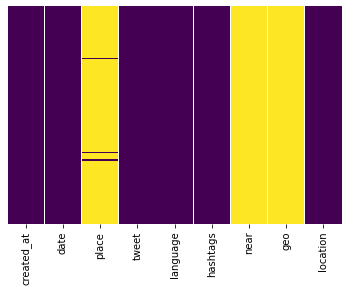

In [111]:
sns.heatmap(ForeignUrbanCities.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [112]:
ForeignUrbanCities.drop('near',axis=1,inplace=True)
ForeignUrbanCities.drop('geo',axis=1,inplace=True)

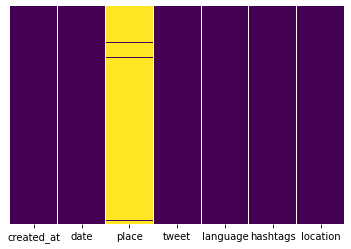

In [113]:
sns.heatmap(ForeignUrbanCities.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
nonNullPlaces = ForeignUrbanCities[ForeignUrbanCities['place'].notna()]
nonNullPlaces

,created_at,date,place,tweet,language,hashtags,location
1,2021-07-23 16:58:12 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.367306, 4...",🔴 #AMSTERDAM #AML 🚓 #p2000 P 1 Ongeval Wegver...,nl,"['amsterdam', 'aml', 'p2000']",Amsterdam
251,2021-07-23 16:03:21 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.3769, 4.8...",Are you an #optimist like me? . . #mindset #op...,en,"['optimist', 'mindset', 'optimism', 'wayout', ...",Amsterdam
273,2021-07-23 15:57:54 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.3874921, ...",🔴 #AMSTERDAM #AML 🚓 #p2000 P 1 Ongeval Wegver...,nl,"['amsterdam', 'aml', 'p2000']",Amsterdam
320,2021-07-23 15:50:40 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.3702157, ...",This job might be a great fit for you: Solutio...,en,"['amsterdam', 'sales']",Amsterdam
357,2021-07-23 15:44:50 EET,2021-07-23,"{'type': 'Point', 'coordinates': [52.38036, 4....",🔴 #AMSTERDAM #AML 🚓 #p2000 P 1 Ongeval Wegver...,nl,"['amsterdam', 'aml', 'p2000']",Amsterdam
...,...,...,...,...,...,...,...
74153,2021-07-22 20:26:39 EET,2021-07-22,"{'type': 'Point', 'coordinates': [45.6387281, ...","Want to land a job like ""Construction Inspecto...",en,"['construction', 'vancouver']",Vancouver
74188,2021-07-22 20:17:40 EET,2021-07-22,"{'type': 'Point', 'coordinates': [49.2827291, ...",We're hiring! Click to apply: Azure Cloud Arch...,en,"['vancouver', 'it']",Vancouver
74205,2021-07-22 20:15:00 EET,2021-07-22,"{'type': 'Point', 'coordinates': [49.2819, -12...","Just posted a photo @ Vancouver, British Colum...",en,[],Vancouver
74216,2021-07-22 20:12:51 EET,2021-07-22,"{'type': 'Point', 'coordinates': [48.43841353,...","Just posted a photo @ Vancouver Island, Canada...",en,[],Vancouver


In [115]:
ForeignUrbanCities.to_csv('ForeignUrbanCities.csv', index=False)

In [116]:
nonNullPlaces.to_csv('nonNullPlaces.csv', index=False)